# EDA - Part 002
Dataset(s) - Students Performance

### Dataset Information

#### Dataset feature general description
The variables that will be taken into account are the following:

| Feature Name | Dataset Feature description | Possible Values in Dataset |
|--|--|--|
| Gender | Student gender | Male, Female |
| Race ethnicity | Student ethnicity | Group A, B, C, D, E | 
| Parental level of Education | The level of education of the student's parents| some high school, high school, associate's degree, bachelor's degree, some college, master's degree|
| Lunch | - Whether the student had lunch or not before taking the tests| standard, reduced/free, None |
| Test Preparation Course | Whether a student had completed a test preparation course or not. | None, completed |
| Math score | A math test score | score from 0 to 100 |
| Reading score | A reading test score | score from 0 to 100 |
| Writing score | A writing test score | score from 0 to 100 |


Data Checks to perform
- Missing Values
- Duplicates
- Data Type
- Number of unique values in each column
- Statistics of current dataset
- Various categories present in categorical columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/luis/Documents/Programming/dev/0760 Complete MLOps Bootcamp With 10 Plus End To End ML Projects Krish Naik/venv_0760_Complete_MLOps_Bootcamp_Krish_Naik_312_01/0760_Course/Section 20 End To End DS Project implementation With Mulitple AWS, Azure Deployment/0760_20_01_ML_Students_Performance/notebook/data/students_performance_0760.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Feature Engineering

* Creating total_score Adding sum of all scores in total score
* Creating another column that calculates the mean (of the three scores) for each row


In [3]:
########### using Lambda Function
df['total_scores_lambda_01'] = df[["math_score","reading_score","writing_score"]].apply(lambda row: sum(row), axis=1)

###########  using Lambda Function
df['total_scores_lambda_02'] = df.apply(lambda row: row["math_score"] + row["reading_score"] + row["writing_score"], axis=1)

###########  Using map to apply the sum_scores function to each row
def sum_scores(row):
    return row["math_score"] + row["reading_score"] + row["writing_score"]

#sum_scores(df)
rows_list = df.to_dict(orient='records')
#rows_list = df.to_dict('index')
#rows_list[0]['math_score']
df['total_scores_map_01'] = list(map(sum_scores, rows_list))
#print(total_scores_map_01)


df['average_score_lambda'] = df.apply(lambda row: (row["math_score"] + row["reading_score"] + row["writing_score"])/3, axis=1)


In [4]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
#df['average_01'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores_lambda_01,total_scores_lambda_02,total_scores_map_01,average_score_lambda,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,229,76.333333,229,76.333333


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores_lambda_01,total_scores_lambda_02,total_scores_map_01,average_score_lambda,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,229,76.333333,229,76.333333


In [6]:
df = df.drop(columns=['total_scores_lambda_01','total_scores_lambda_02','total_scores_map_01','average_score_lambda'],axis=1)
df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Bivariate Analysis
Does Gender have any impact on Student's performance?

In [9]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


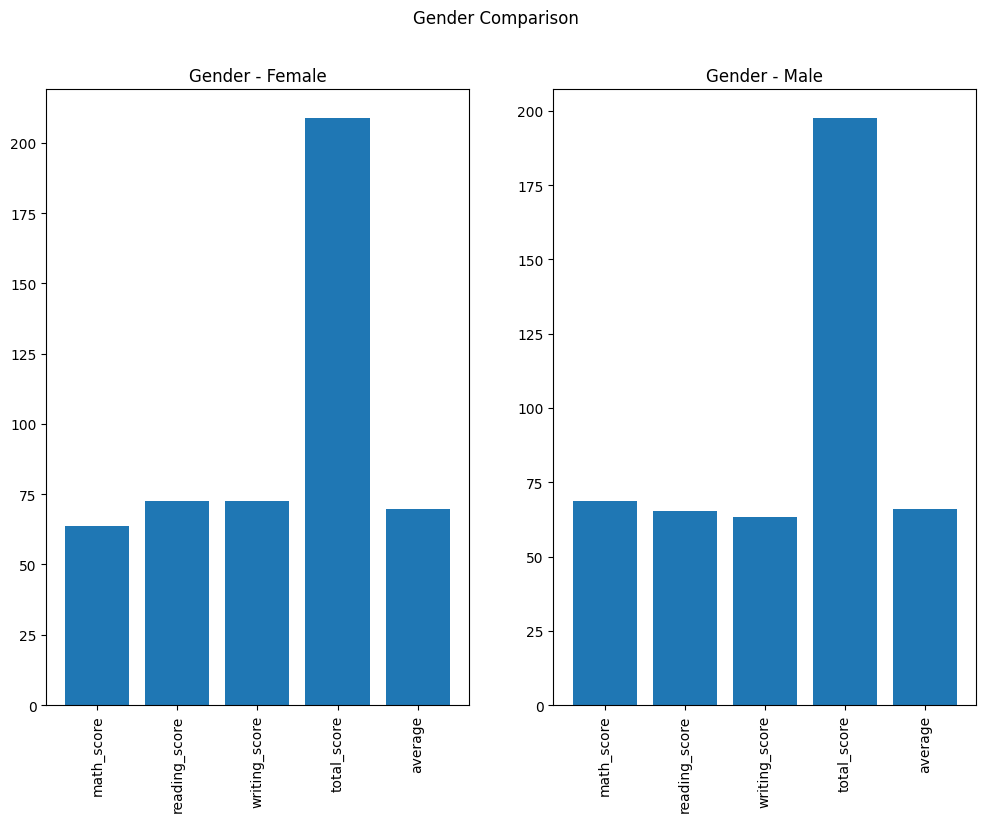

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(data=gender_group, x=gender_group.loc['female'].index,height=gender_group.loc['female'].values)
plt.xticks(ticks=range(0, len(gender_group.loc['female'])), labels=gender_group.loc['female'].index, rotation=90)
plt.title("Gender - Female")
plt.subplot(1,2,2)
plt.bar(data=gender_group, x=gender_group.loc['male'].index,height=gender_group.loc['male'].values)
plt.xticks(ticks=range(0, len(gender_group.loc['male'])), labels=gender_group.loc['male'].index, rotation=90)
plt.title("Gender - Male")

plt.suptitle("Gender Comparison")

plt.show()

In [11]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


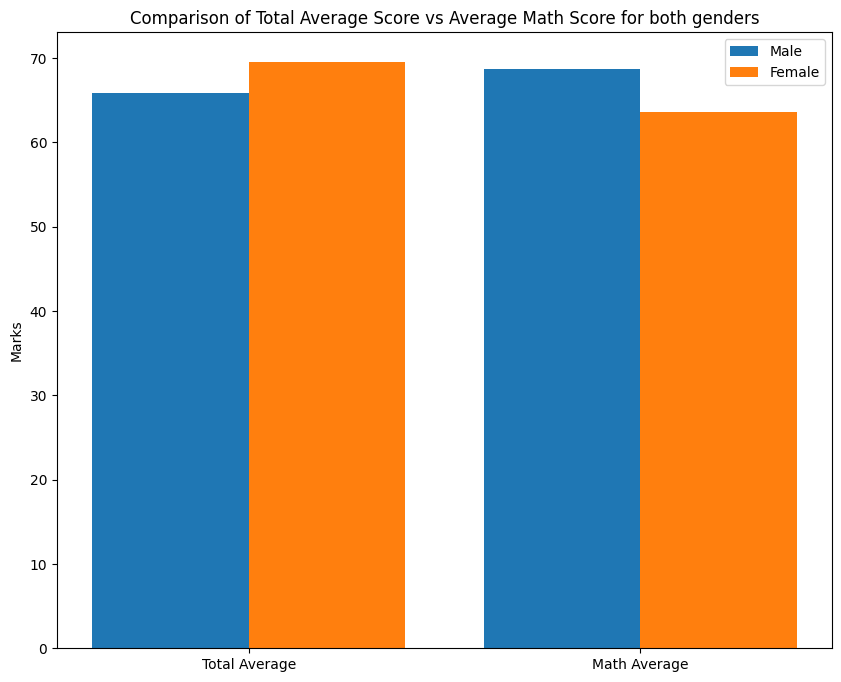

In [12]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']
#female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
#emale_scores
#male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
#male_scores

female_scores = [gender_group.loc['female']['average'], gender_group.loc['female']['math_score']]
#female_scores##[69.56949806949807, 63.633204633204635]
male_scores = [gender_group.loc['male']['average'], gender_group.loc['male']['math_score']]
#male_scores##[65.8374827109267, 68.72821576763485]

X_axis = np.arange(len(X))
#X_axis##array([0, 1])

plt.bar(x=X_axis - 0.2, height=male_scores, width=0.4, label='Male')
plt.bar(x=X_axis + 0.2, height=female_scores, width=0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")

plt.title("Comparison of Total Average Score vs Average Math Score for both genders", fontweight='light')##fontweight='light', 'bold'

plt.legend()
plt.show()


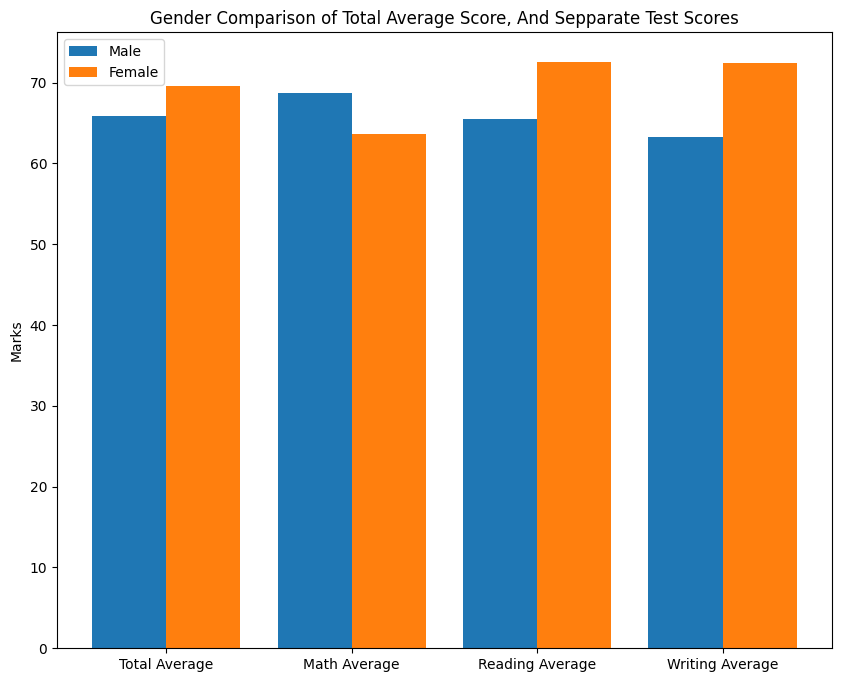

In [13]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average', 'Reading Average', 'Writing Average']
#female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
#emale_scores
#male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
#male_scores

female_scores = [gender_group.loc['female']['average'], gender_group.loc['female']['math_score'], gender_group.loc['female']['reading_score'], gender_group.loc['female']['writing_score']]
#female_scores##[69.56949806949807, 63.633204633204635]
male_scores = [gender_group.loc['male']['average'], gender_group.loc['male']['math_score'], gender_group.loc['male']['reading_score'], gender_group.loc['male']['writing_score']]
male_scores##[65.8374827109267, 68.72821576763485]

X_axis = np.arange(len(X))
#X_axis##array([0, 1, 2, 3])

plt.bar(x=X_axis - 0.2, height=male_scores, width=0.4, label='Male')
plt.bar(x=X_axis + 0.2, height=female_scores, width=0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")

plt.title("Gender Comparison of Total Average Score, And Sepparate Test Scores", fontweight='light')##fontweight='light', 'bold'

plt.legend()
plt.show()


## Insights
Female students have a higher Total Average score than male students.
On average, male students performed better on math scores.
On average, female students performed significantly better than male students on Reasing and writing exams.

In [14]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

## Race/Ethnicity Column

* How is group-wise distribution?
* Does Race/Ethnicity have an impact on student's performance?


### Univariate analysis - How is group-wise distribution?

In [15]:
df['race_ethnicity'][0:2]

0    group B
1    group C
Name: race_ethnicity, dtype: object

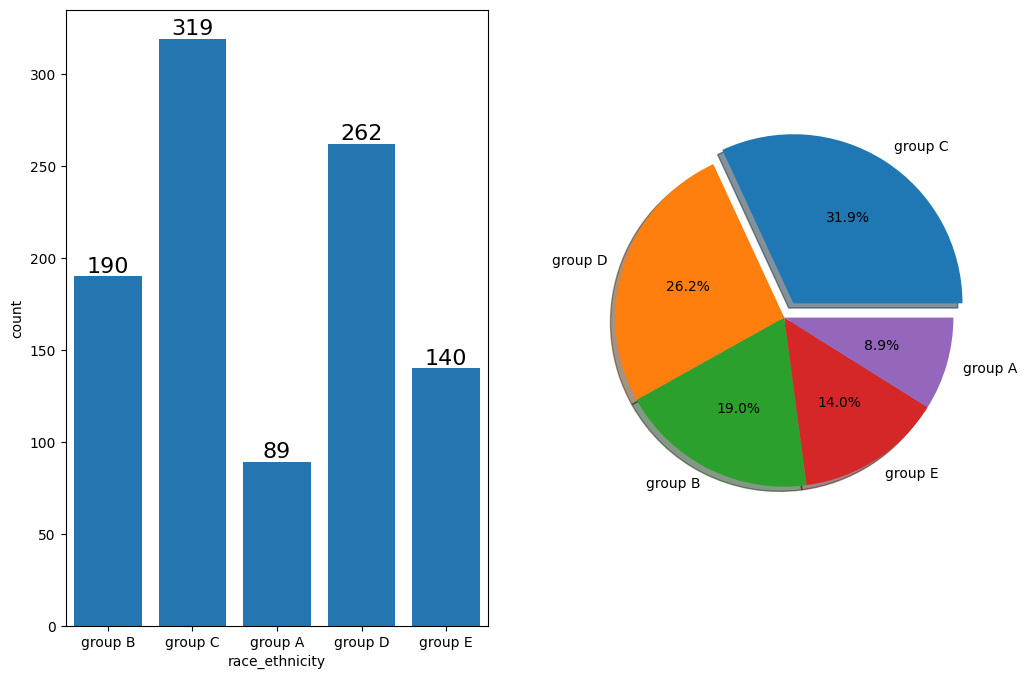

In [16]:
figure, ax = plt.subplots(1, 2, figsize=(12, 8))
#sns.countplot(data=df, x=df['race_ethnicity'], palette='muted',saturation=0.95, ax=ax[0])
sns.countplot(data=df, x=df['race_ethnicity'], color='tab:blue',saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)

plt.pie(data=df, x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True)
plt.show()

### Insights

* Most of the students belong to to group C and D
* Group A has the least amount of students, which could mean that they could be a minority group

## Bivariate Analysis
* Does Race/Ethnicity has any impact on the student's performance?

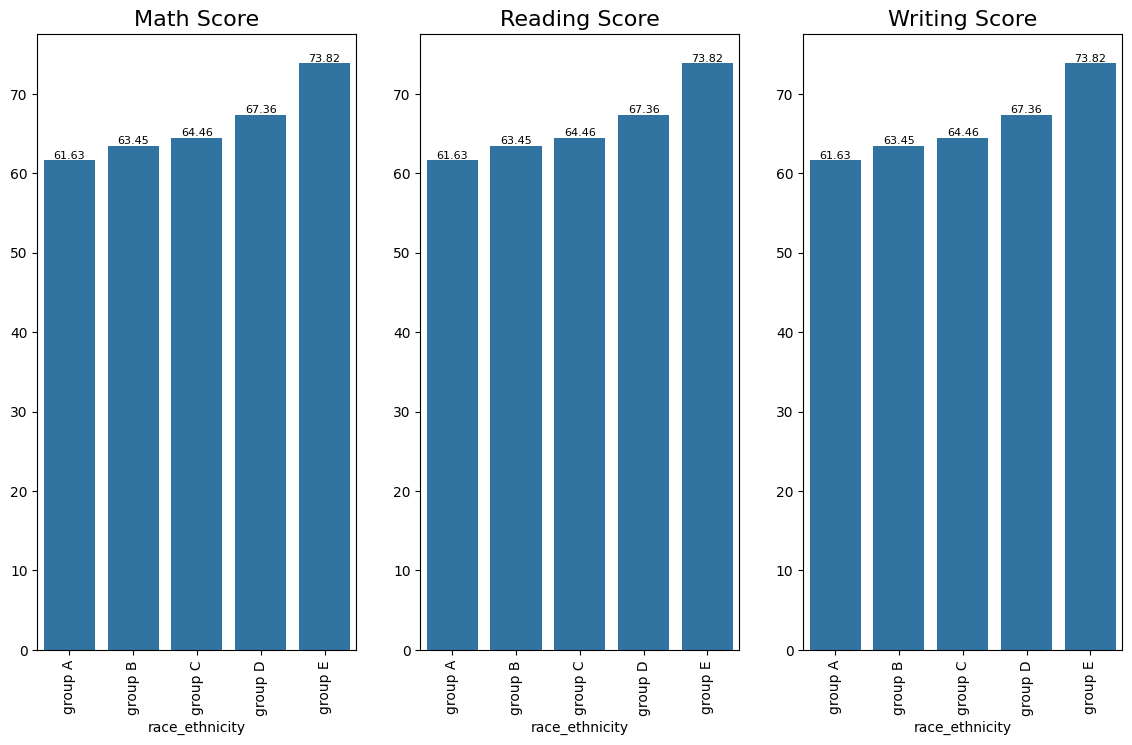

In [17]:
group_data_ethnicity = df.groupby(by='race_ethnicity')
#group_data['math_score'].mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,8))
sns.barplot(x=group_data_ethnicity['math_score'].mean().index, y=group_data_ethnicity['math_score'].mean().values,ax=axes[0], color='tab:blue')
for container in axes[0].containers:
    axes[0].bar_label(container,color='black',size=8, fmt='%.2f')
axes[0].set_xticks(ticks=np.arange(0, len(group_data_ethnicity['math_score'].mean().index)), labels=group_data_ethnicity['math_score'].mean().index, rotation=90)
axes[0].set_title('Math Score', color='black', size=16)

sns.barplot(x=group_data_ethnicity['reading_score'].mean().index, y=group_data_ethnicity['math_score'].mean().values,ax=axes[1], color='tab:blue')
for container in axes[1].containers:
    axes[1].bar_label(container,color='black',size=8, fmt='%.2f')
axes[1].set_xticks(ticks=np.arange(0, len(group_data_ethnicity['reading_score'].mean().index)), labels=group_data_ethnicity['reading_score'].mean().index, rotation=90)
axes[1].set_title('Reading Score', color='black', size=16)

sns.barplot(x=group_data_ethnicity['writing_score'].mean().index, y=group_data_ethnicity['math_score'].mean().values,ax=axes[2], color='tab:blue')
for container in axes[2].containers:
    axes[2].bar_label(container,color='black',size=8, fmt='%.2f')
axes[2].set_xticks(ticks=np.arange(0, len(group_data_ethnicity['writing_score'].mean().index)), labels=group_data_ethnicity['writing_score'].mean().index, rotation=90)
axes[2].set_title('Writing Score', color='black', size=16)
plt.show()

### Insights

* Group E had the higher score for all tests
* Group A had the lowest score for all tests

### Insights
* Group A has the least amount of students, which could mean that they could be a minority group that 

There is no more data to prove this but an hypothesis would be that group A is a minority group and low resources could be the reason that they are scoring low scores due to that.


### Univariate Analysis

* Parenthal Level of Education
* Does Parenthal level of education has any impact on Student's performance?


### Univariate Analysis

In [18]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

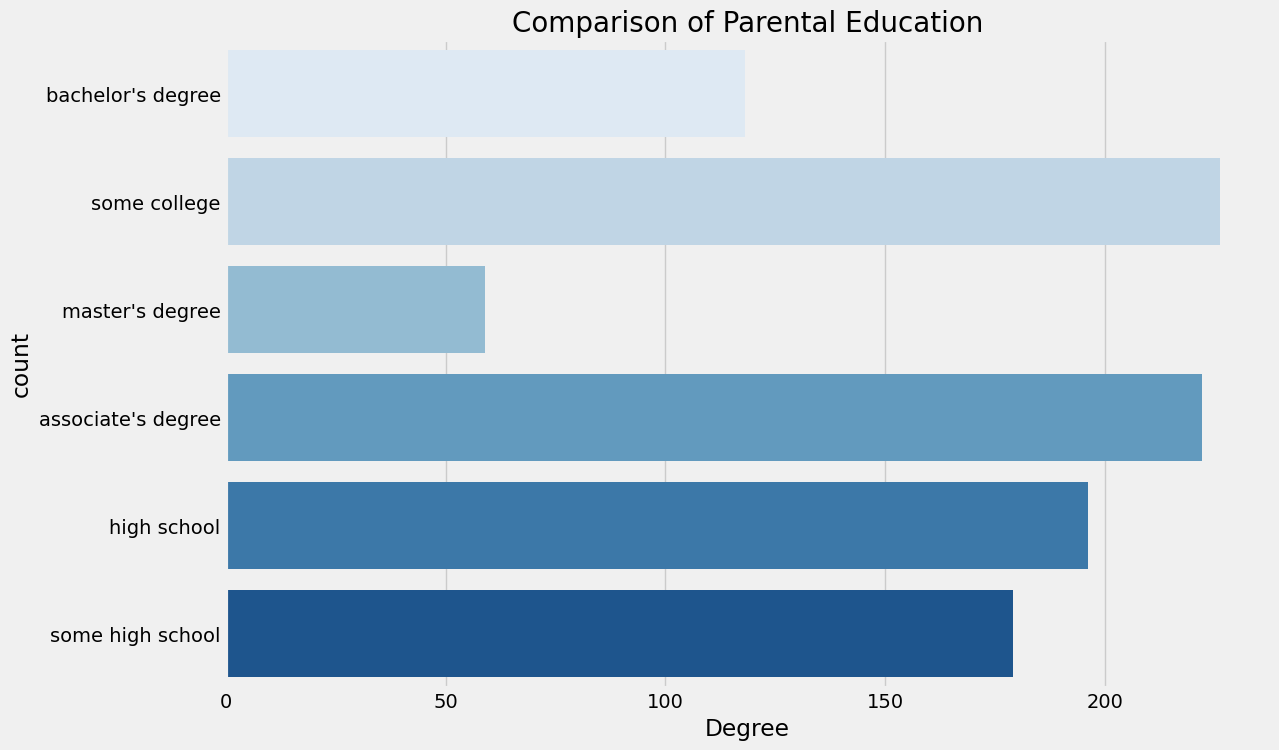

In [19]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
#sns.countplot(df['parental_level_of_education'], palette='Blues')
sns.countplot(data = df, y='parental_level_of_education', hue='parental_level_of_education', palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights

* Most parents have some college and associates degree
* There are less parents who have a Master's degree

### Bivariate Analysis

* Parenthal Level of Education
* Does Parenthal level of education has any impact on Student's performance?


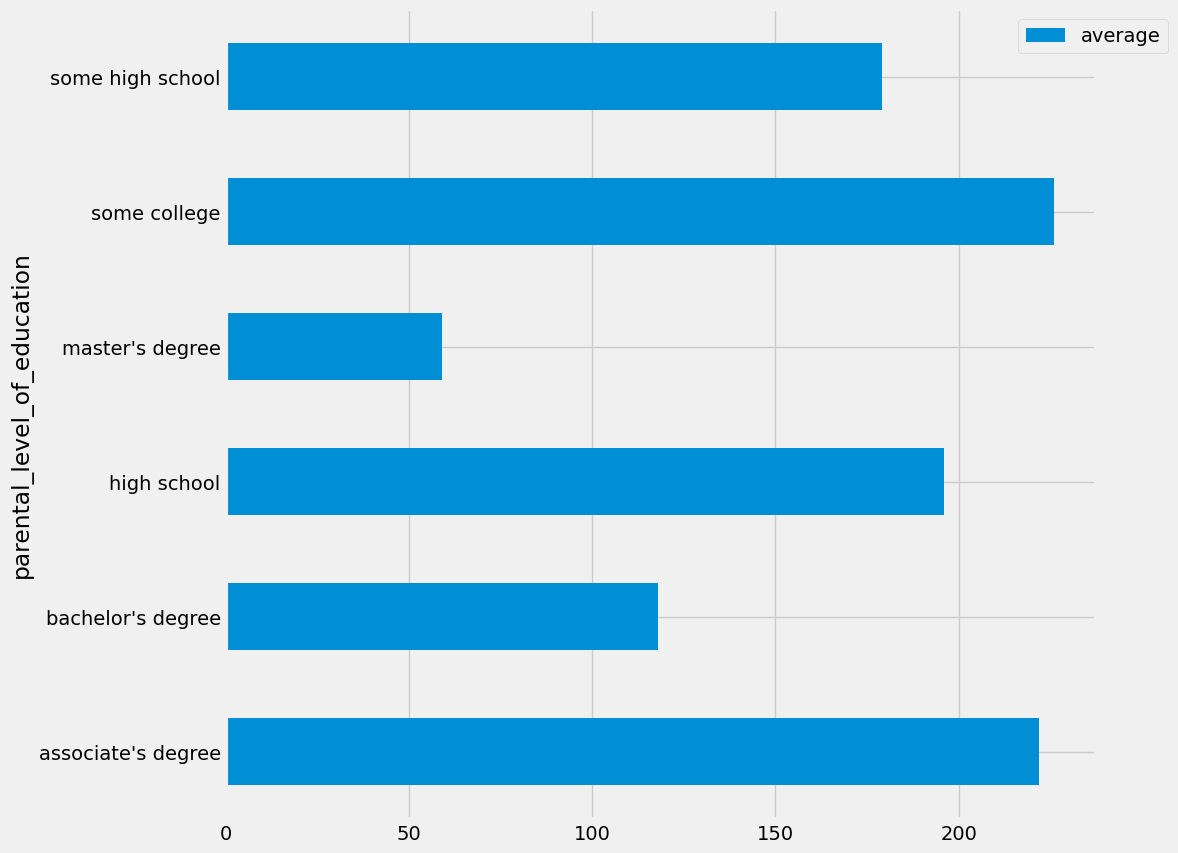

In [20]:
#df.groupby(by='parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10,10))

#df.groupby('parental_level_of_education')['average'].plot(kind='barh',figsize=(10,10))
#df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',
#figsize=(10,10))

#df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()


df.groupby('parental_level_of_education').count()['average'].plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.5, fontsize=14)
plt.show()

In [21]:
#df.groupby(by='parental_level_of_education').agg(['min','max'])## This works
##df.groupby(by='parental_level_of_education').agg('mean')## This does not work

## note: When using .agg now I have to specify numeric_only=True To keep the old behaviour
## Source: https://github.com/pandas-dev/pandas/issues/57031
df.groupby(by='parental_level_of_education').agg('mean',numeric_only=True)


,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


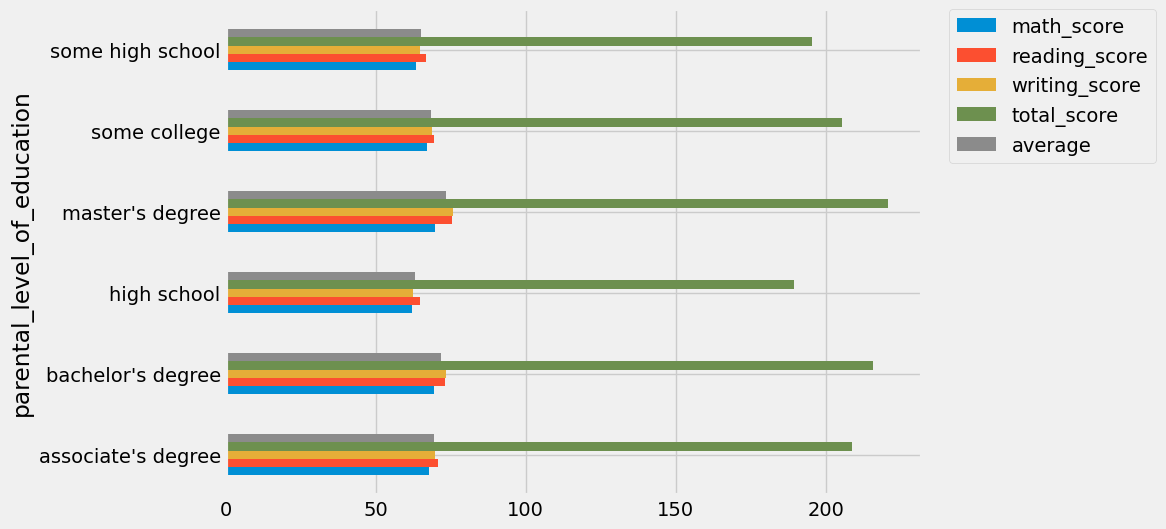

In [22]:
groupby_agg_mean_lvl_ed = df.groupby(by='parental_level_of_education').agg('mean',numeric_only=True)

groupby_agg_mean_lvl_ed.plot(kind='barh', figsize=(8,6))
plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
plt.show()
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
#plt.barh()

#plt.show()

### Insights
Almost all scores seem to be similar but there are some differences.
Students whon had lower scores have parents whose level of education is high scool.
Students who have higher scores have parents whose level of education is either master's degree and bachelor's degree.

### Lunch Column

* Which type of lunch is most common amongst students?
* Is there an effect between lunch and test results?

In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

/var/folders/1l/qzn1l5vs497g0fs6wn2b862m0000gn/T/ipykernel_23353/3927706651.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


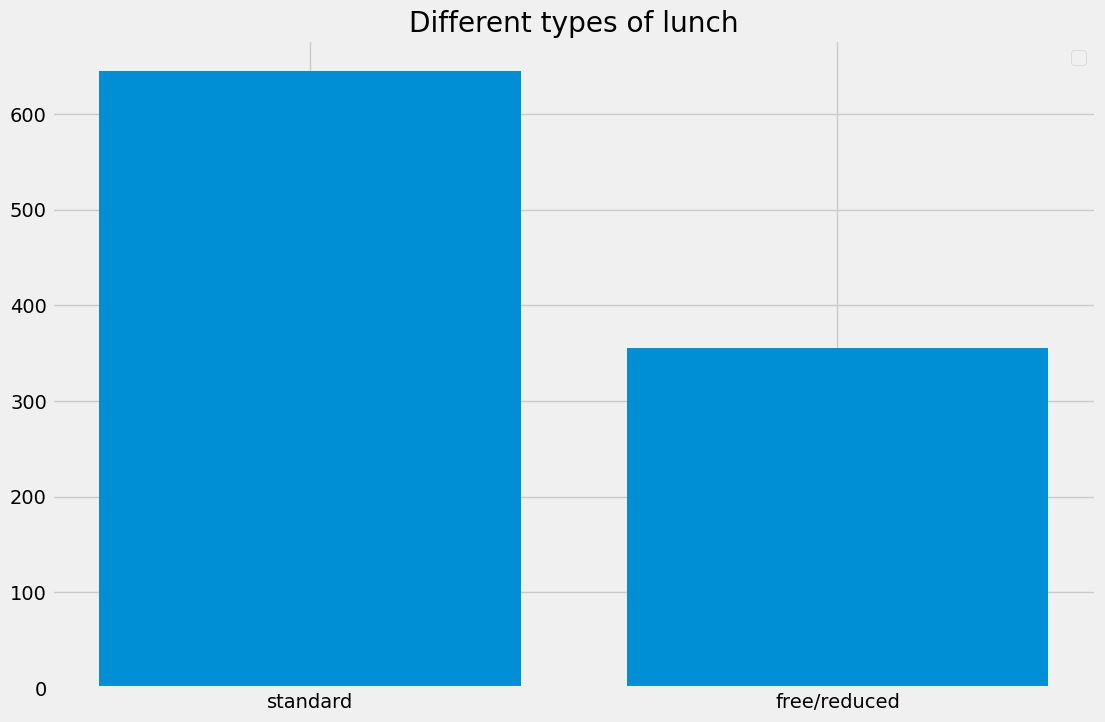

In [24]:
## * Which type of lunch is most common amongst students?

#plt.bar(df.groupby(by='lunch').count()['average'].index,df.groupby(by='lunch').count()['average'].values)

plt.bar(df['lunch'].value_counts().index, df['lunch'].value_counts().values)
plt.title("Different types of lunch")
plt.legend()
plt.show()

/var/folders/1l/qzn1l5vs497g0fs6wn2b862m0000gn/T/ipykernel_23353/912770119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


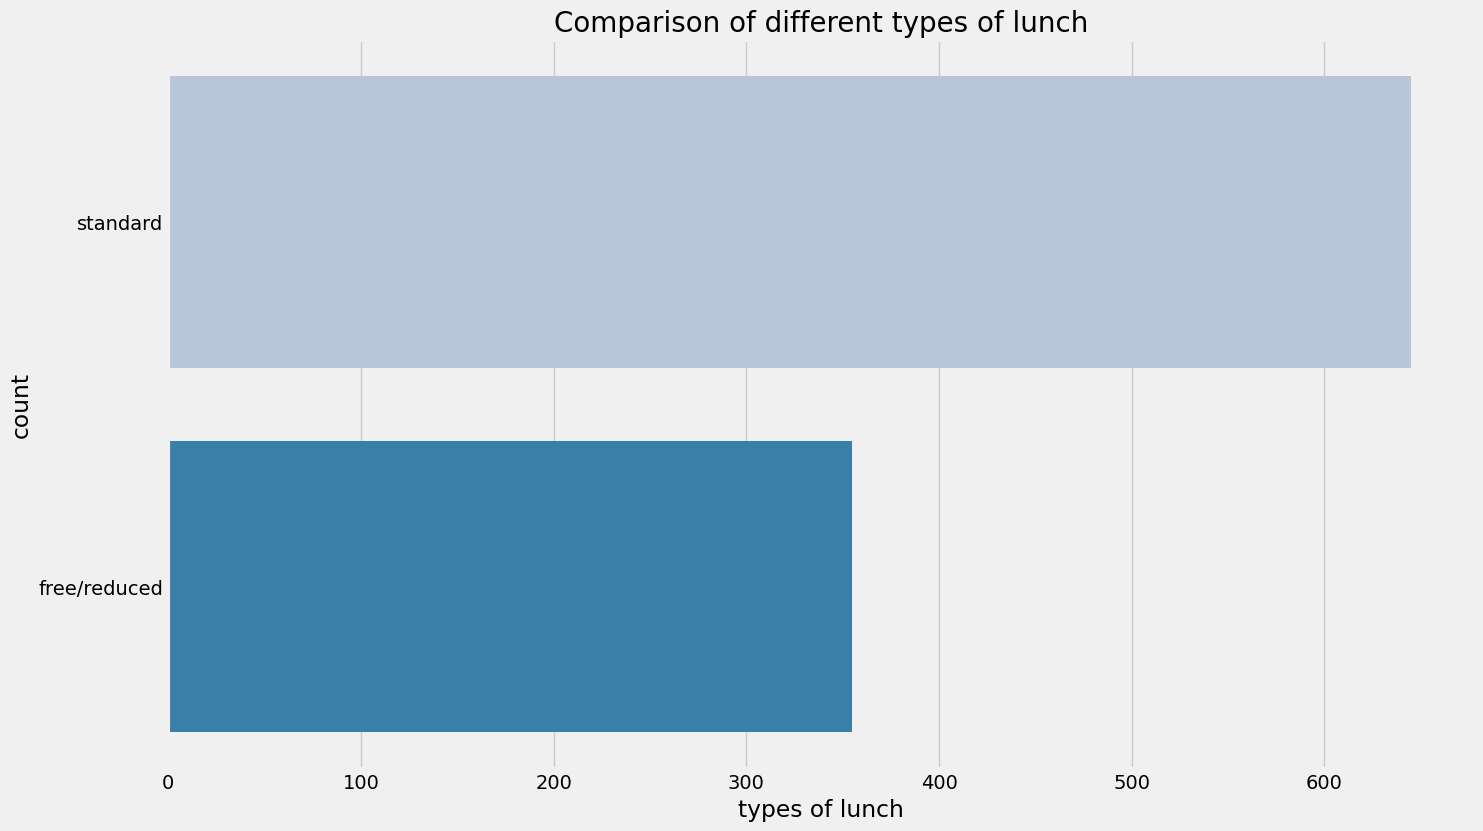

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

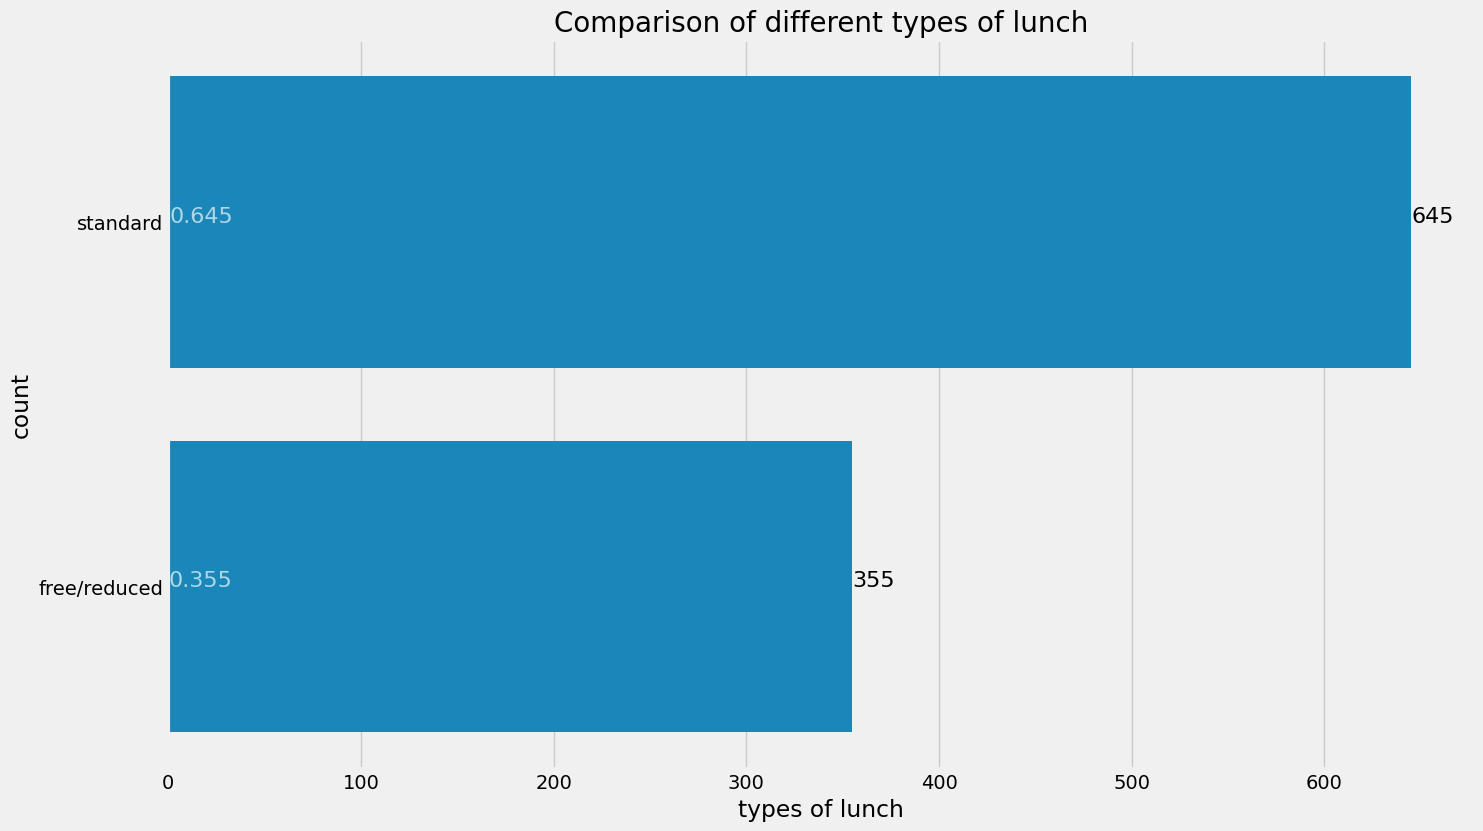

In [26]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
#sns.countplot(df['lunch'], palette = 'PuBu')
sns.countplot(df['lunch'])
for i01,i02 in enumerate(df['lunch'].value_counts(normalize=True)):
    #print(i01)
    #print(i02)
    plt.text(x=i02,y=i01,s=i02, fontdict={'size':16, 'weight':'normal', 'color':'lightblue', 'rotation':0, 'alpha':1.0})
for i01,i02 in enumerate(df['lunch'].value_counts(normalize=False)):
    #print(i01)
    #print(i02)
    plt.text(x=i02,y=i01,s=i02, fontdict={'size':16, 'weight':'normal', 'color':'k', 'rotation':0, 'alpha':1.0})
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights

There are more students that were served the standard lunch than the free or reduced lunch.

## Bivariate Analysis
* Does lunch had any impact on the student's performance?

In [27]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [28]:
groupby_agg_mean_lvl_ed

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


In [29]:
groupby_agg_mean_lunch.columns

NameError: name 'groupby_agg_mean_lunch' is not defined

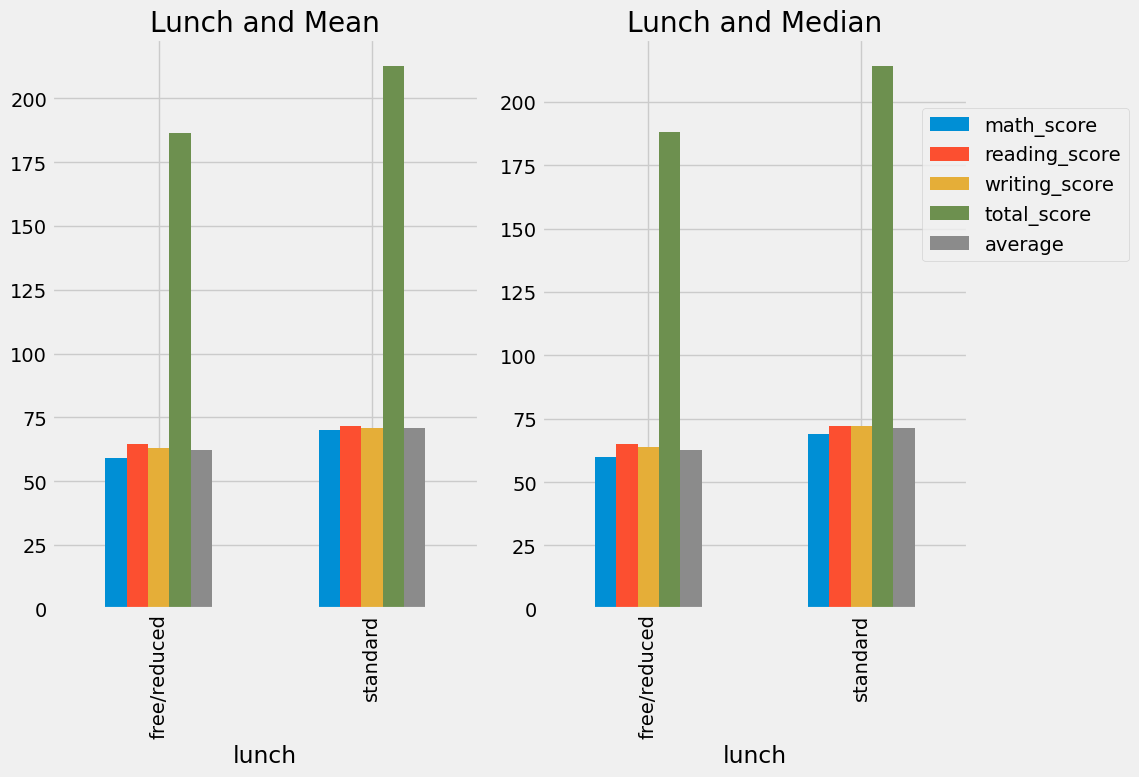

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))



groupby_agg_mean_lunch = df.groupby(by='lunch').agg('mean',numeric_only=True)
groupby_agg_median_lunch = df.groupby(by='lunch').agg('median',numeric_only=True)

groupby_agg_mean_lunch.plot(kind='bar', ax=axes[0])
axes[0].set_title("Lunch and Mean")
axes[0].get_legend().remove()

#plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., ax=axes[0])
groupby_agg_median_lunch.plot(kind='bar', ax=axes[1])
axes[1].set_title("Lunch and Median")
axes[1].get_legend().remove()

#plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., ax=axes[1])
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.14, 0.85), borderaxespad=0.)
#fig.legend(handles, labels, bbox_to_anchor=(1.14, 1), loc='lower right', borderaxespad=0.)

plt.tight_layout()
#plt.legend(loc=2, bbox_to_anchor=(1.04, 1))

#handles, labels = ax.get_legend_handles_labels()

plt.show()
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
#plt.barh()

#plt.show()

### Insights
Students who had standard lunch performed better than those who had the free/reduced lunch

### Test Preparation Course Column
* Want to see if test preparation course had any effect in scores


<Axes: xlabel='lunch', ylabel='writing_score'>

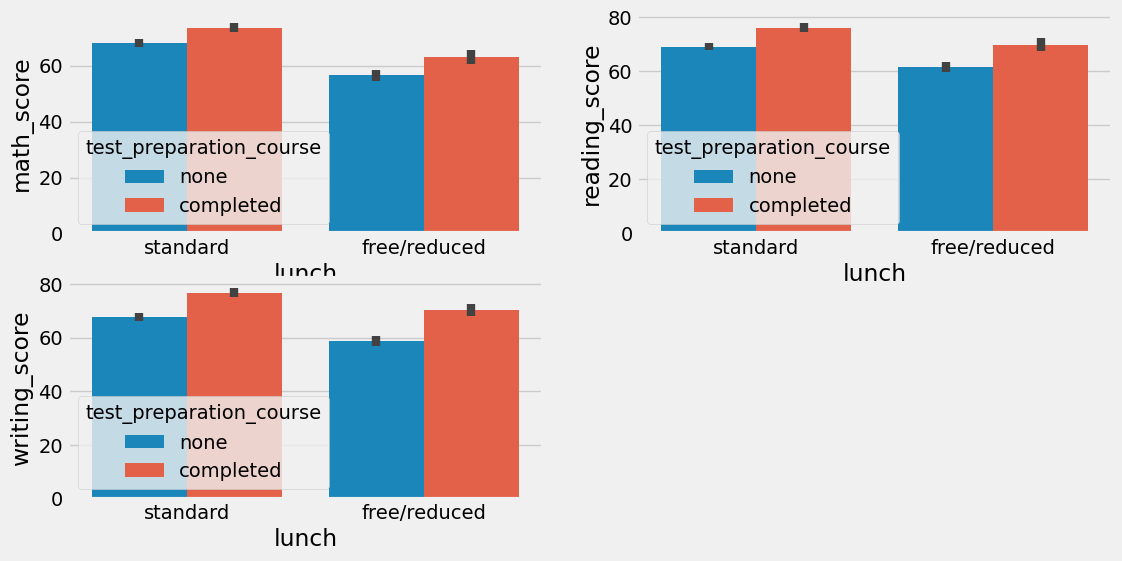

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])


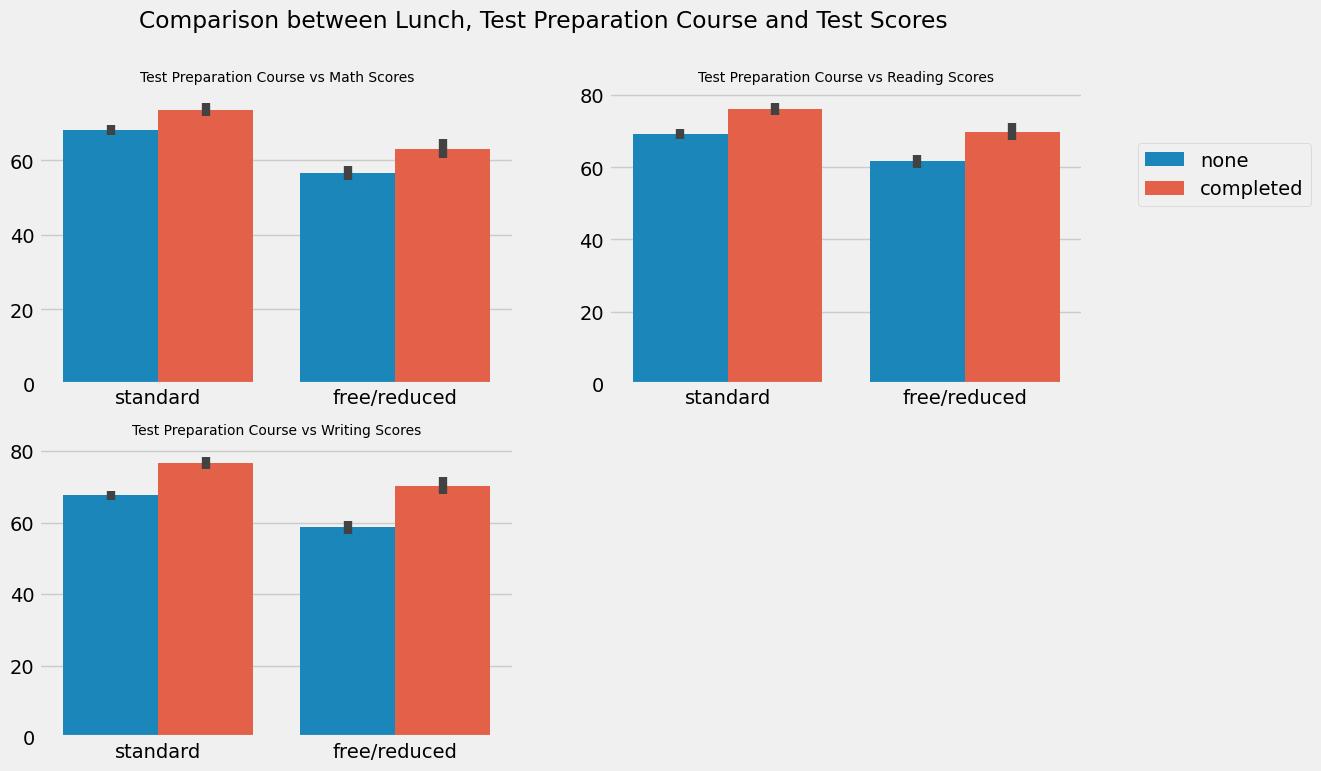

In [32]:
#plt.figure(figsize=(12,6))
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
#plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'], ax=axes[0][0])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[0][0].set_ylabel("")
axes[0][0].set_xlabel("")
#axes[0][0].legend(bbox_to_anchor=(1.14, 0.85))
axes[0][0].get_legend().remove()
axes[0][0].set_title("Test Preparation Course vs Math Scores", fontsize=10)

#plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'], ax=axes[0][1])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[0][1].set_ylabel("")
axes[0][1].set_xlabel("")
axes[0][1].legend(bbox_to_anchor=(1.5, 0.85))
#axes[0][1].get_legend().remove()
axes[0][1].set_title("Test Preparation Course vs Reading Scores", fontsize=10)

#plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'], ax=axes[1][0])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[1][0].set_ylabel("")
axes[1][0].set_xlabel("")
#axes[1][0].legend(bbox_to_anchor=(1.14, 0.85))
axes[1][0].get_legend().remove()
axes[1][0].set_title("Test Preparation Course vs Writing Scores", fontsize=10)


axes[1][1].set_ylabel("")
axes[1][1].set_xlabel("")
#axes[1][1].set_xticks()
#axes[1][1].set_yticks()
axes[1][1].grid("")
## Removing xticks and yticks for axes[1][1]
axes[1][1].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

#plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., ax=axes[1])
#handles, labels = plt.gca().get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.14, 0.85), borderaxespad=0.)
#fig.legend(handles, labels, bbox_to_anchor=(1.14, 1), loc='lower right', borderaxespad=0.)

plt.suptitle("Comparison between Lunch, Test Preparation Course and Test Scores")
plt.show()

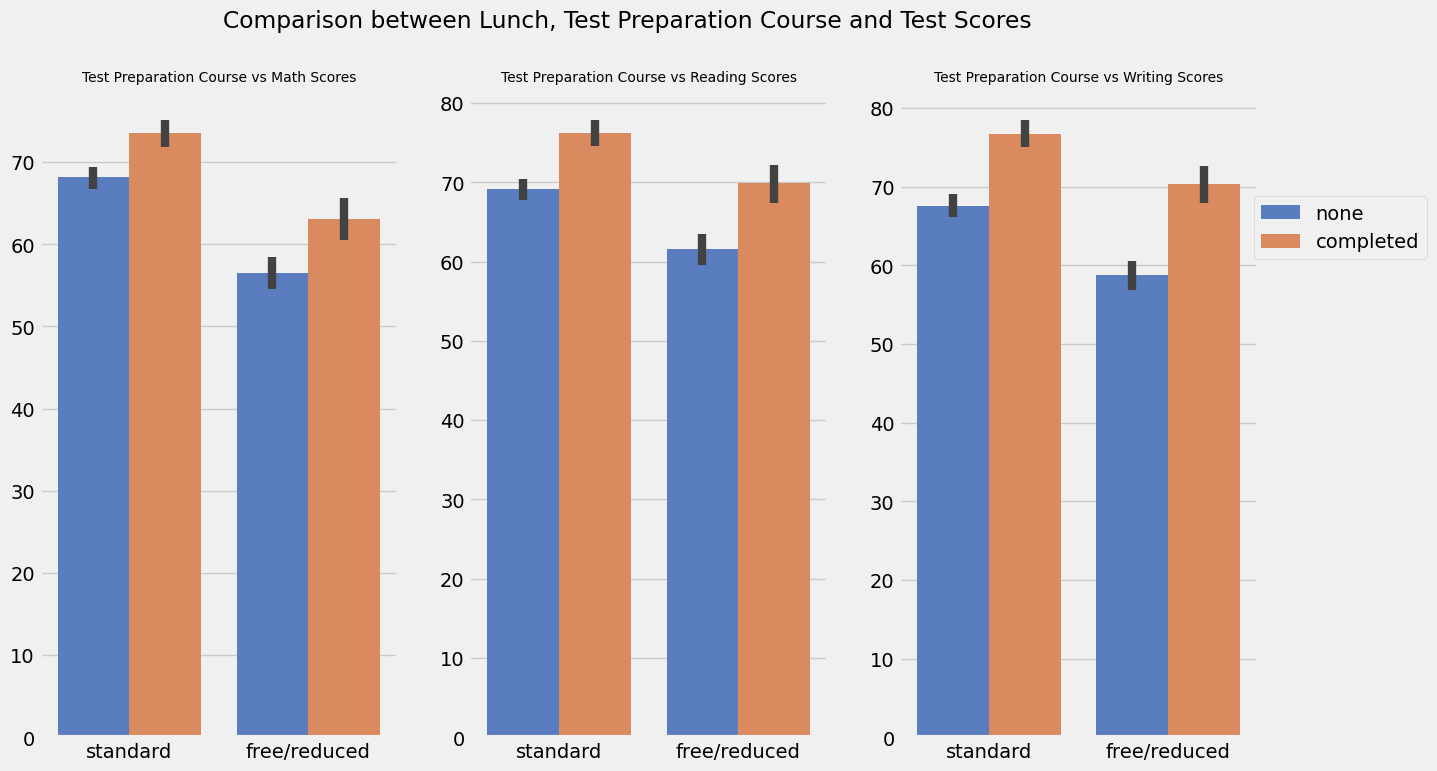

In [33]:
#plt.figure(figsize=(12,6))
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14,8))
#plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'], palette='muted',ax=axes[0])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[0].set_ylabel("")
axes[0].set_xlabel("")
#axes[0].legend(bbox_to_anchor=(1.14, 0.85))
axes[0].get_legend().remove()
axes[0].set_title("Test Preparation Course vs Math Scores", fontsize=10)

#plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'], palette='muted',ax=axes[1])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[1].set_ylabel("")
axes[1].set_xlabel("")
#axes[1].legend(bbox_to_anchor=(1.5, 0.85))
axes[1].get_legend().remove()
axes[1].set_title("Test Preparation Course vs Reading Scores", fontsize=10)

#plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'], palette='muted',ax=axes[2])
#plt.legend(bbox_to_anchor=(1.14, 0.85))
axes[2].set_ylabel("")
axes[2].set_xlabel("")
axes[2].legend(bbox_to_anchor=(1.5, 0.85))
#axes[2].get_legend().remove()
axes[2].set_title("Test Preparation Course vs Writing Scores", fontsize=10)


#axes[1][1].set_ylabel("")
#axes[1][1].set_xlabel("")
##axes[1][1].set_xticks()
##axes[1][1].set_yticks()
#axes[1][1].grid("")
### Removing xticks and yticks for axes[1][1]
#axes[1][1].tick_params(left = False, right = False , labelleft = False , 
#                labelbottom = False, bottom = False) 

#plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., ax=axes[1])
#handles, labels = plt.gca().get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.14, 0.85), borderaxespad=0.)
#fig.legend(handles, labels, bbox_to_anchor=(1.14, 1), loc='lower right', borderaxespad=0.)

plt.suptitle("Comparison between Lunch, Test Preparation Course and Test Scores")
plt.show()

### Insights

* Students who had Standard lunch had a better score performance than those who had a free/reduced lunch
* Students who had completed the course preparation did better than those who did not
* The students who had highest scores were the ones who had standard lunch and completed the course preparation
* The students who had the lowest scores were the ones who had free/reduced lunch and did not complete the course preparation


### Bivariate Analysis

* Does Parental education and lunch have any impact on the student's performance?

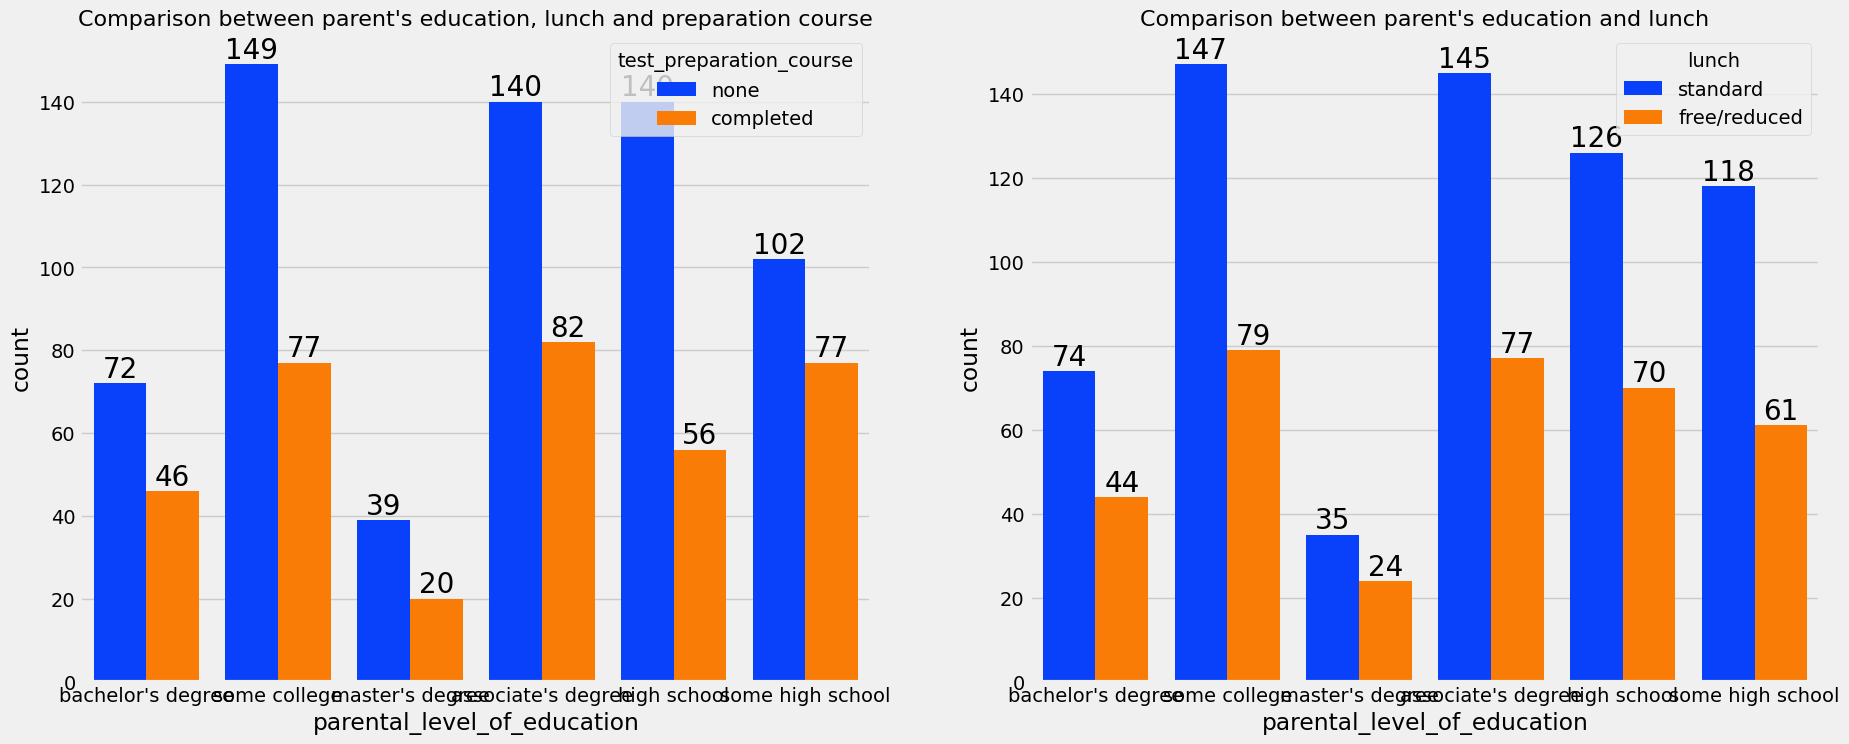

In [34]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.countplot(data=df, x=df['parental_level_of_education'], palette = 'bright', hue='test_preparation_course', saturation=0.95, ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container,color='black',size=20)

axes[0].set_title("Comparison between parent's education, lunch and preparation course",color='black',size=16)
    
sns.countplot(data=df, x=df['parental_level_of_education'], palette = 'bright', hue='lunch', saturation=0.95, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container,color='black',size=20)   

axes[1].set_title("Comparison between parent's education and lunch",color='black',size=16)

plt.show()



### Insights

Countplot
Most of the students did not had any test preparation course

The majority of students who did not complete or attend to a test preparation course were those whose parents had a level of education of some college, associate's degree, and high school.
Most of the student's who had completed the test preparation score were those whose parents had an associates'

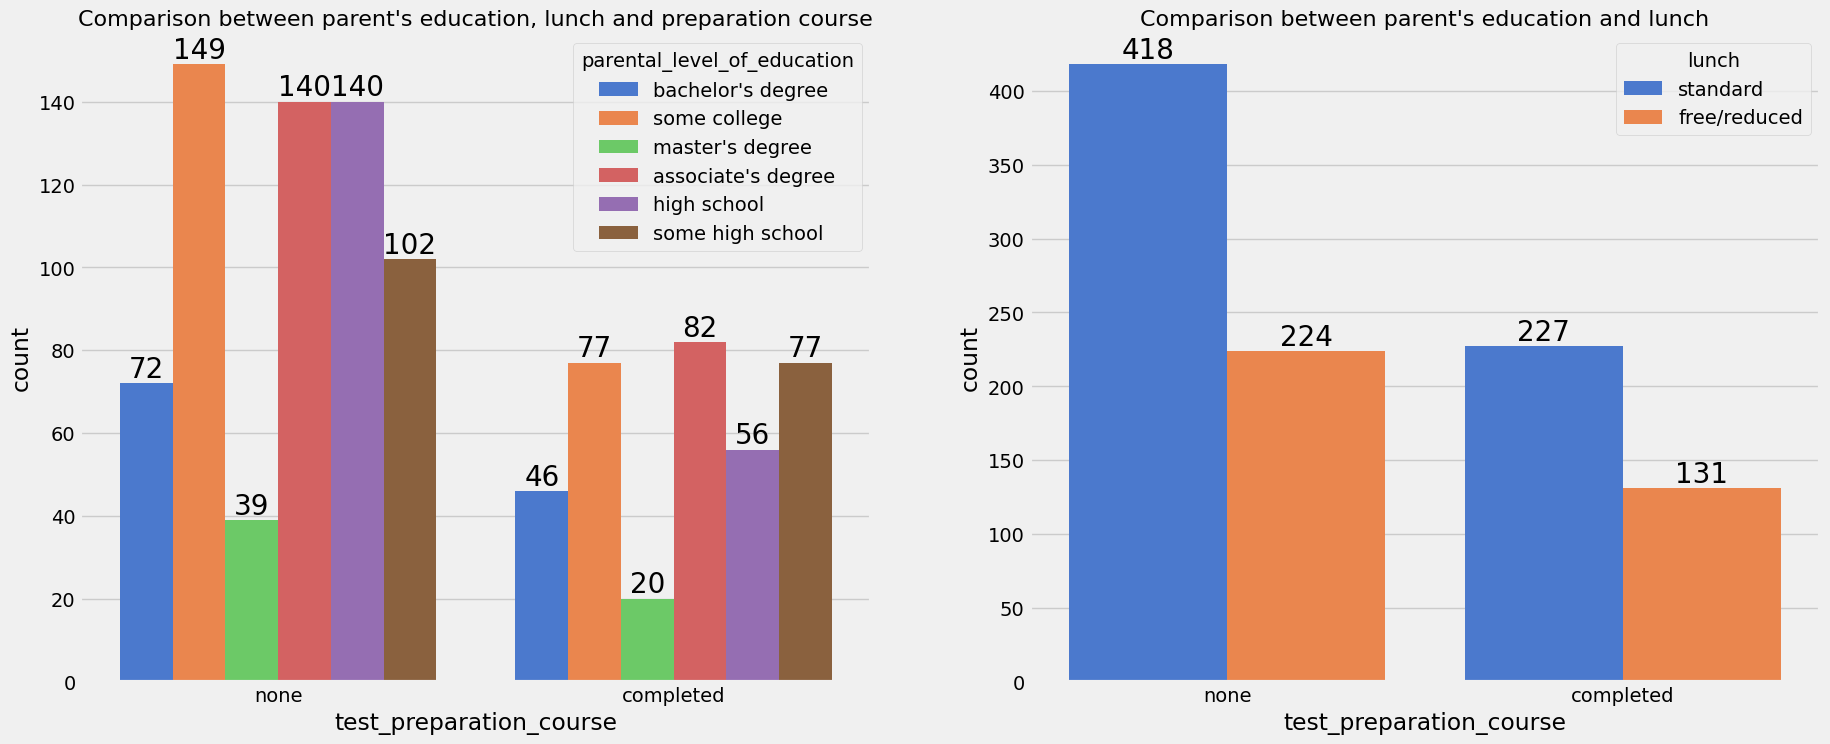

In [40]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.countplot(data=df, x=df['test_preparation_course'], palette = 'muted', hue='parental_level_of_education', saturation=0.95, ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container,color='black',size=20)

axes[0].set_title("Comparison between parent's education, lunch and preparation course",color='black',size=16)
    
sns.countplot(data=df, x=df['test_preparation_course'], palette = 'muted', hue='lunch', saturation=0.95, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container,color='black',size=20)   

axes[1].set_title("Comparison between parent's education and lunch",color='black',size=16)


plt.show()



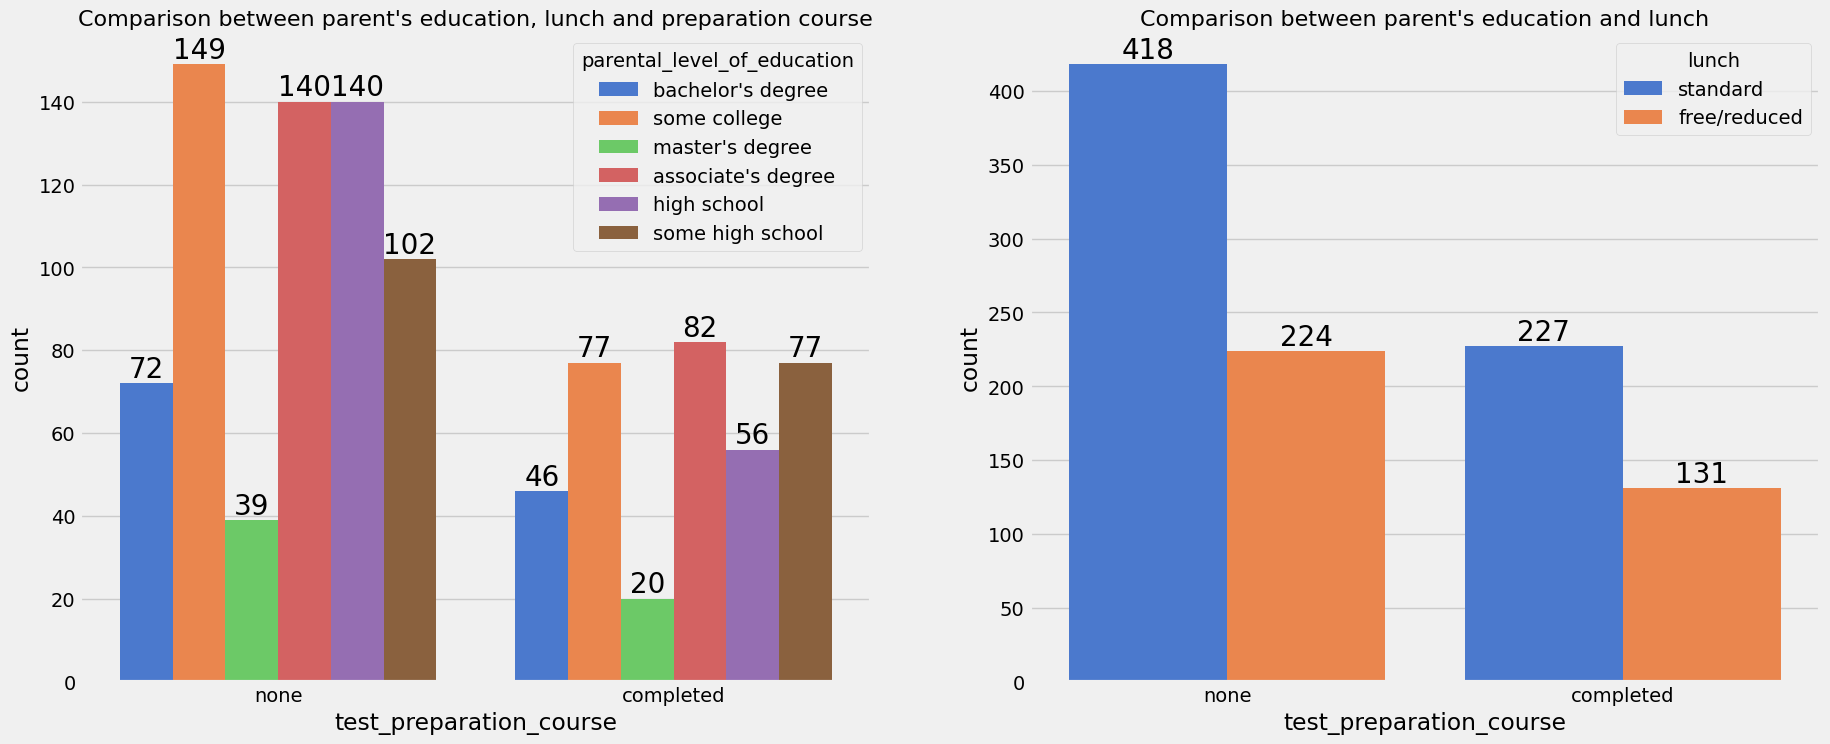

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.countplot(data=df, x=df['test_preparation_course'], palette = 'muted', hue='parental_level_of_education', saturation=0.95, ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container,color='black',size=20)

axes[0].set_title("Comparison between parent's education, lunch and preparation course",color='black',size=16)
    
sns.countplot(data=df, x=df['test_preparation_course'], palette = 'muted', hue='lunch', saturation=0.95, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container,color='black',size=20)   

axes[1].set_title("Comparison between parent's education and lunch",color='black',size=16)

plt.show()



In [48]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [ ]:
grpby_preparation_course_count = df.groupby(by='test_preparation_course').count()
grpby_preparation_course_count[]

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,,,,,
completed,358,358,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642,642,642


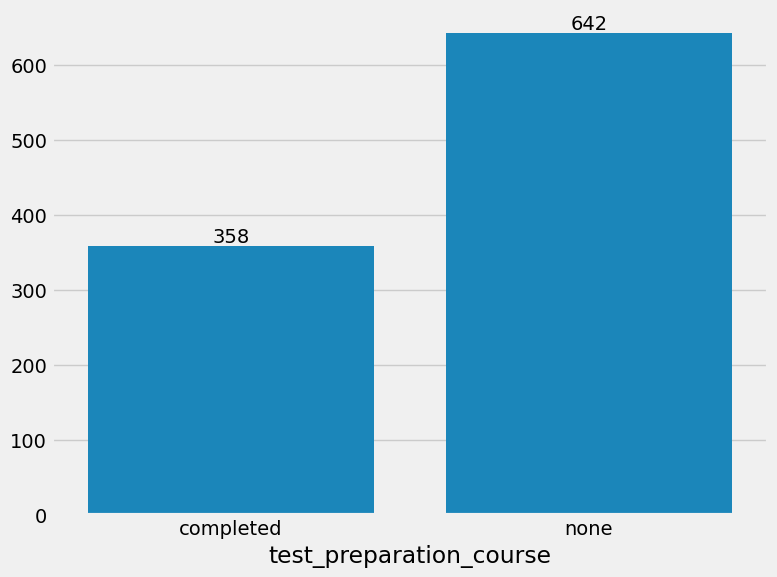

In [ ]:
grpby_preparation_course_count = df.groupby(by='test_preparation_course').count()
fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(8,6))
#plt.figure(figsize=(8,6))
#plt.subplot(2,2,1)
sns.barplot(data=grpby_preparation_course_count, x=grpby_preparation_course_count.index, y=grpby_preparation_course_count
['lunch'].values)
for container in axs.containers:
    axs.bar_label(container, color='k', size=14)
#plt.subplot(2,2,2)
#sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
#plt.subplot(2,2,3)
plt.tight_layout()
plt.show()


### Insights
Not real insights were gathered from this except that most of the students did not prepare for the course.

Most of the students who did not prepare for the course, had parents whose education level were: Some college, Associate's degree and High school

Most of the students who completed the course, had parents whose education level were: addociate's degree, some college, some high school

Most of the students who did not take or finish the preparation course had standard lunch.
Most of the students who completed the course also had standard lunch.



### Checking Outliers

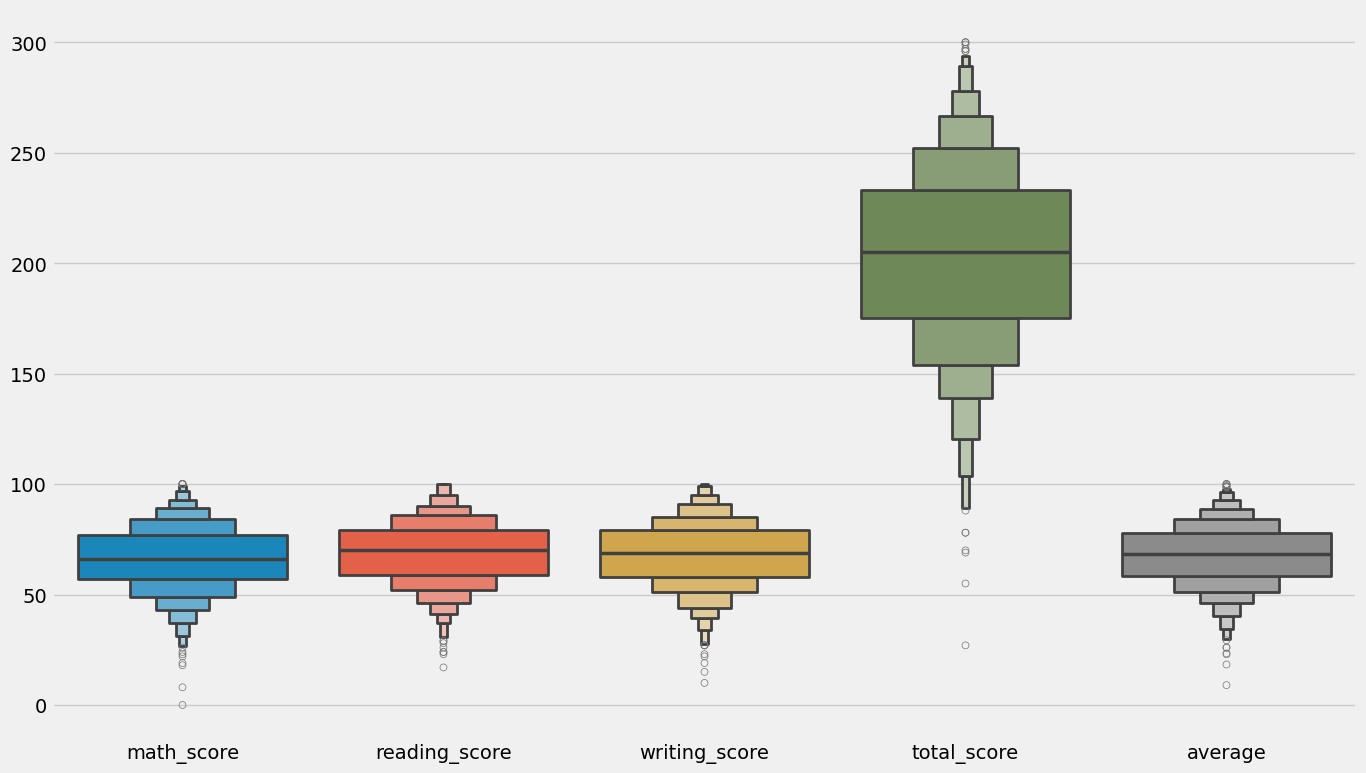

In [116]:
sns.boxenplot(data=df)
plt.show()

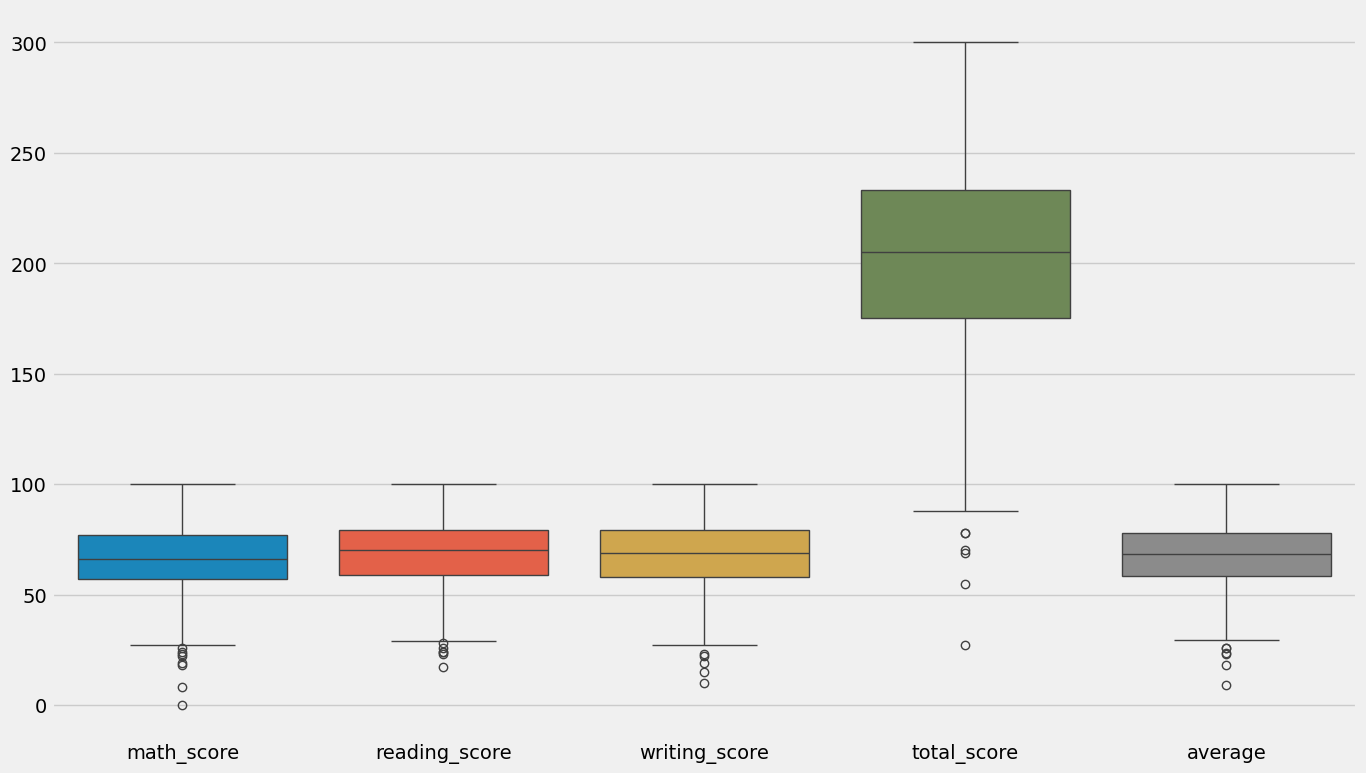

In [115]:
sns.boxplot(data=df)
plt.show()

## Can see that there seem to be outliers on the lower end of the spectrum for all scores


In [93]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

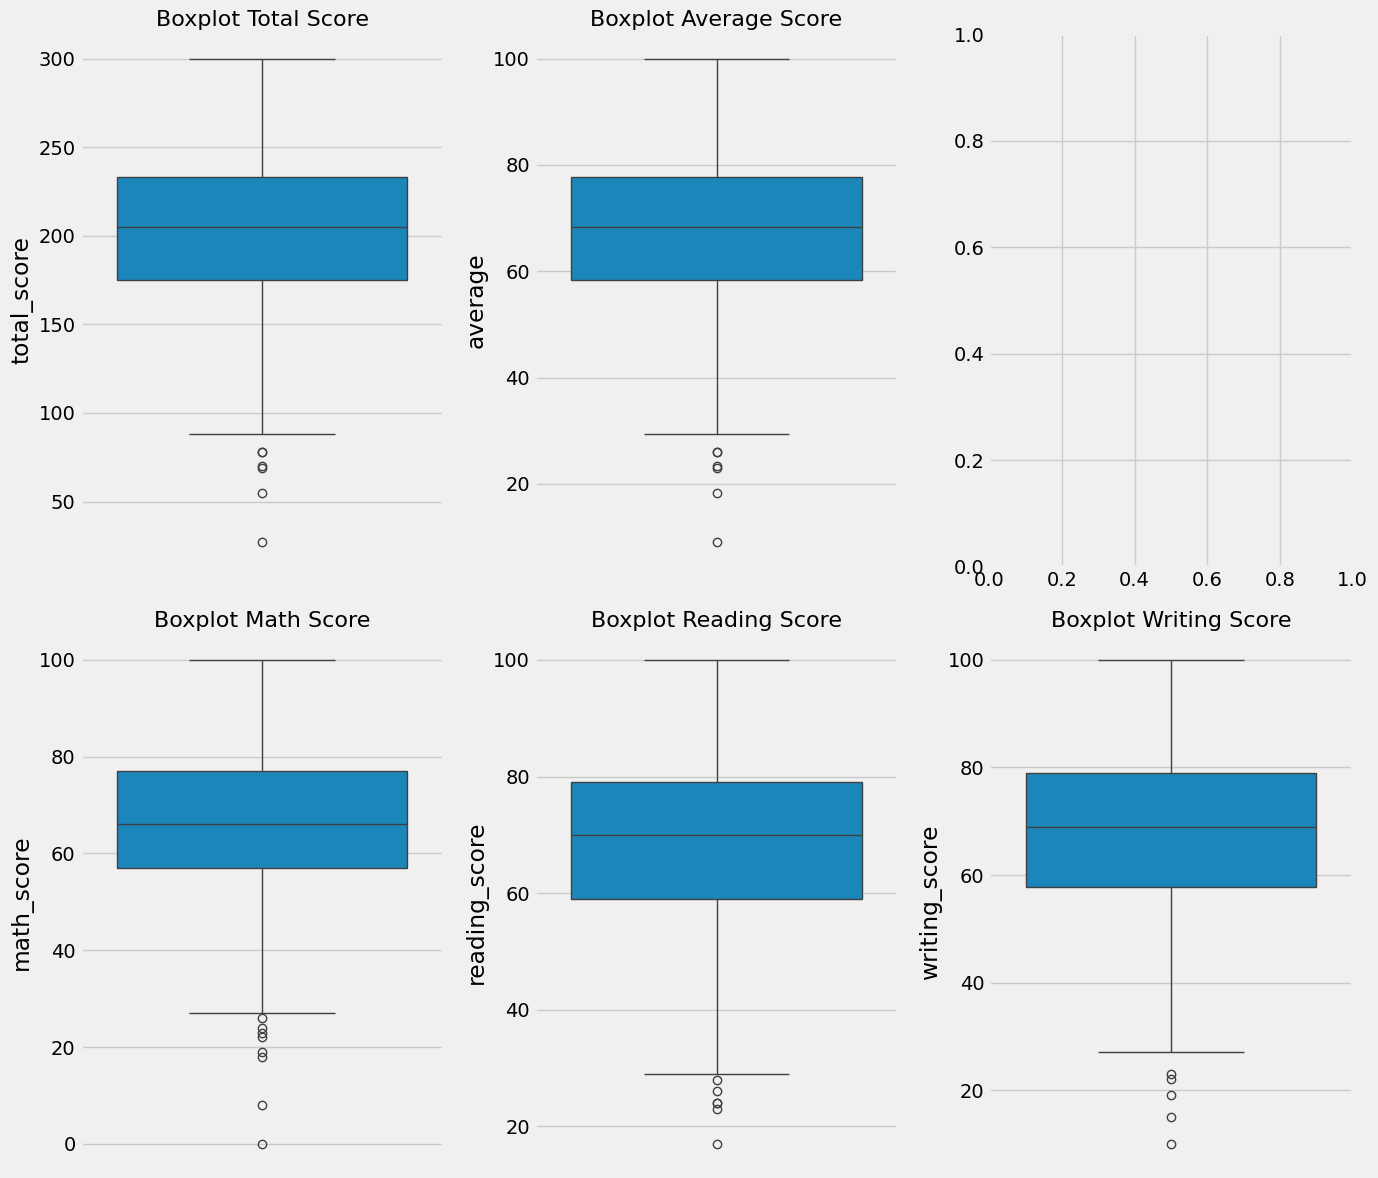

In [ ]:
columns_to_see_scores = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12))

sns.boxplot(data=df['total_score'], ax=axes[0,0])
axes[0,0].set_title("Boxplot Total Score", fontsize=16)

sns.boxplot(data=df['average'], ax=axes[0,1])
axes[0,1].set_title("Boxplot Average Score", fontsize=16)


sns.boxplot(data=df['math_score'], ax=axes[1,0])
axes[1,0].set_title("Boxplot Math Score", fontsize=16)

sns.boxplot(data=df['reading_score'], ax=axes[1,1])
axes[1,1].set_title("Boxplot Reading Score", fontsize=16)

sns.boxplot(data=df['writing_score'], ax=axes[1,2])
axes[1,2].set_title("Boxplot Writing Score", fontsize=16)


plt.tight_layout()
plt.show()

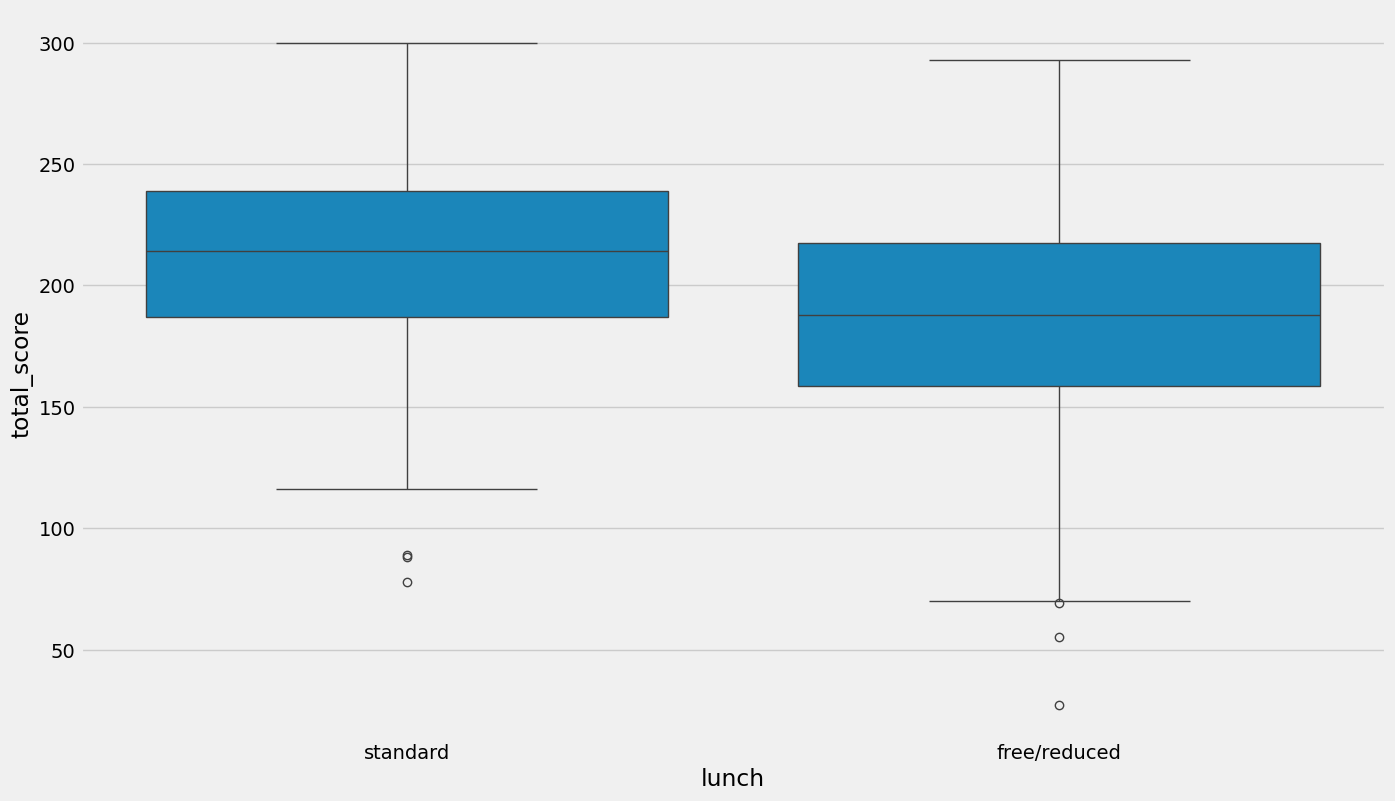

In [ ]:
sns.boxplot(data=df, x='lunch', y='total_score')
plt.show()



In [136]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

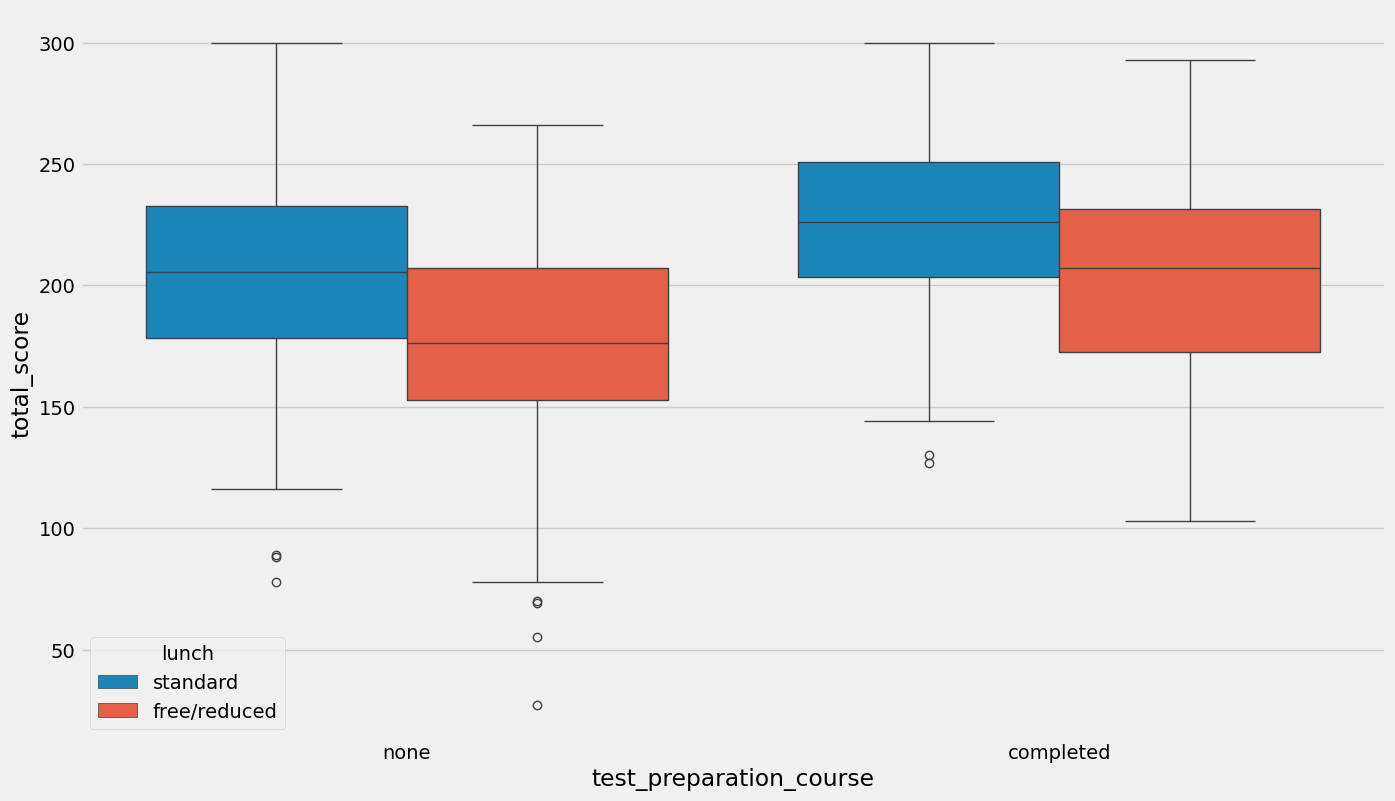

In [138]:
sns.boxplot(data=df, x='test_preparation_course', y='total_score', hue='lunch')
plt.show()

* There is a difference between those students who had standard lunch and the ones who had a free or reduced lunch before taking the exam with respect to scores. Students who took the standard lunch had a better male_scores

* There are outliers on the lower end of the spectrum for students who did not take the preparation score and the s tudents who completed the test preparation course and had standard lunch

* There does not seem to be outliers for the students who had the free/reduced lunch and completed the test preparation course

* Students who took the preparation course and had free/reduced lunch had a better score compared to those students who also had the free/reduced lunch but did not take the preparation course.

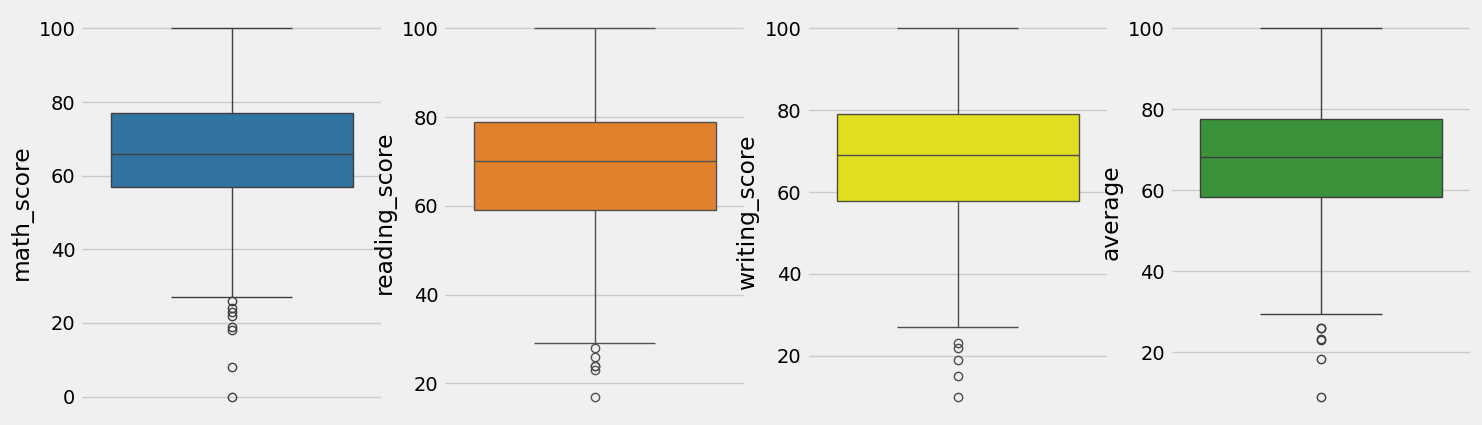

In [255]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='tab:blue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='tab:orange')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='tab:green')
plt.show()

### Multivariate Analysis - Pairplot


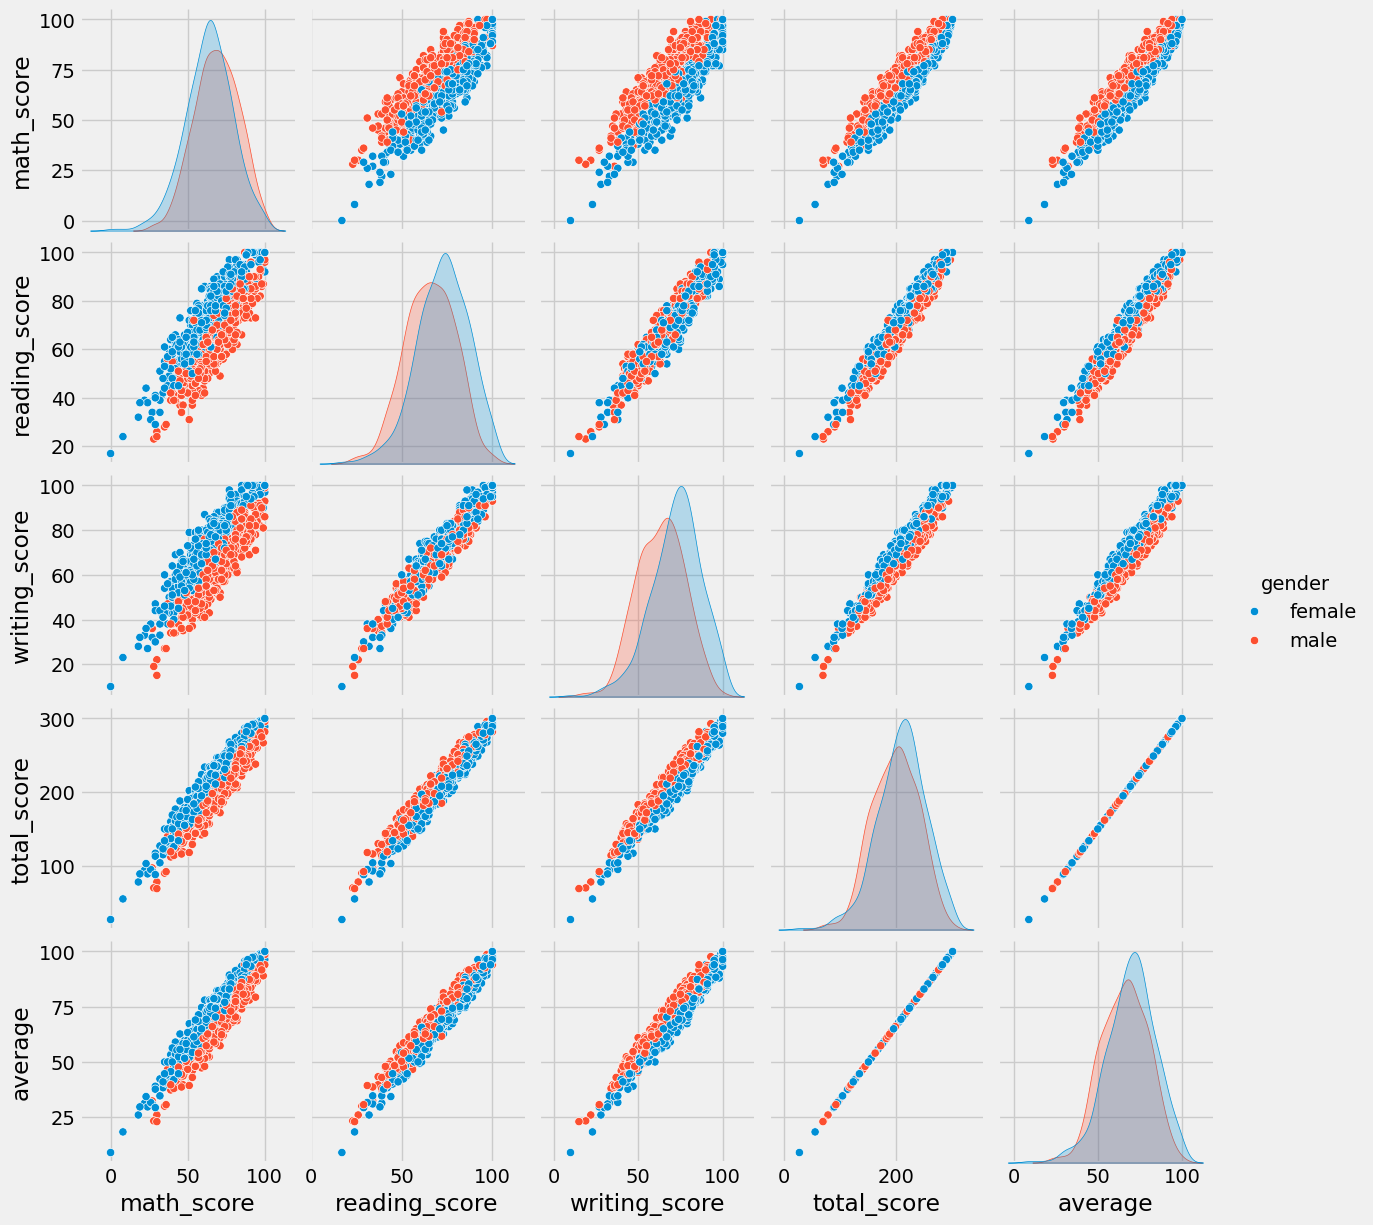

In [256]:
sns.pairplot(data=df, hue='gender')
plt.show()

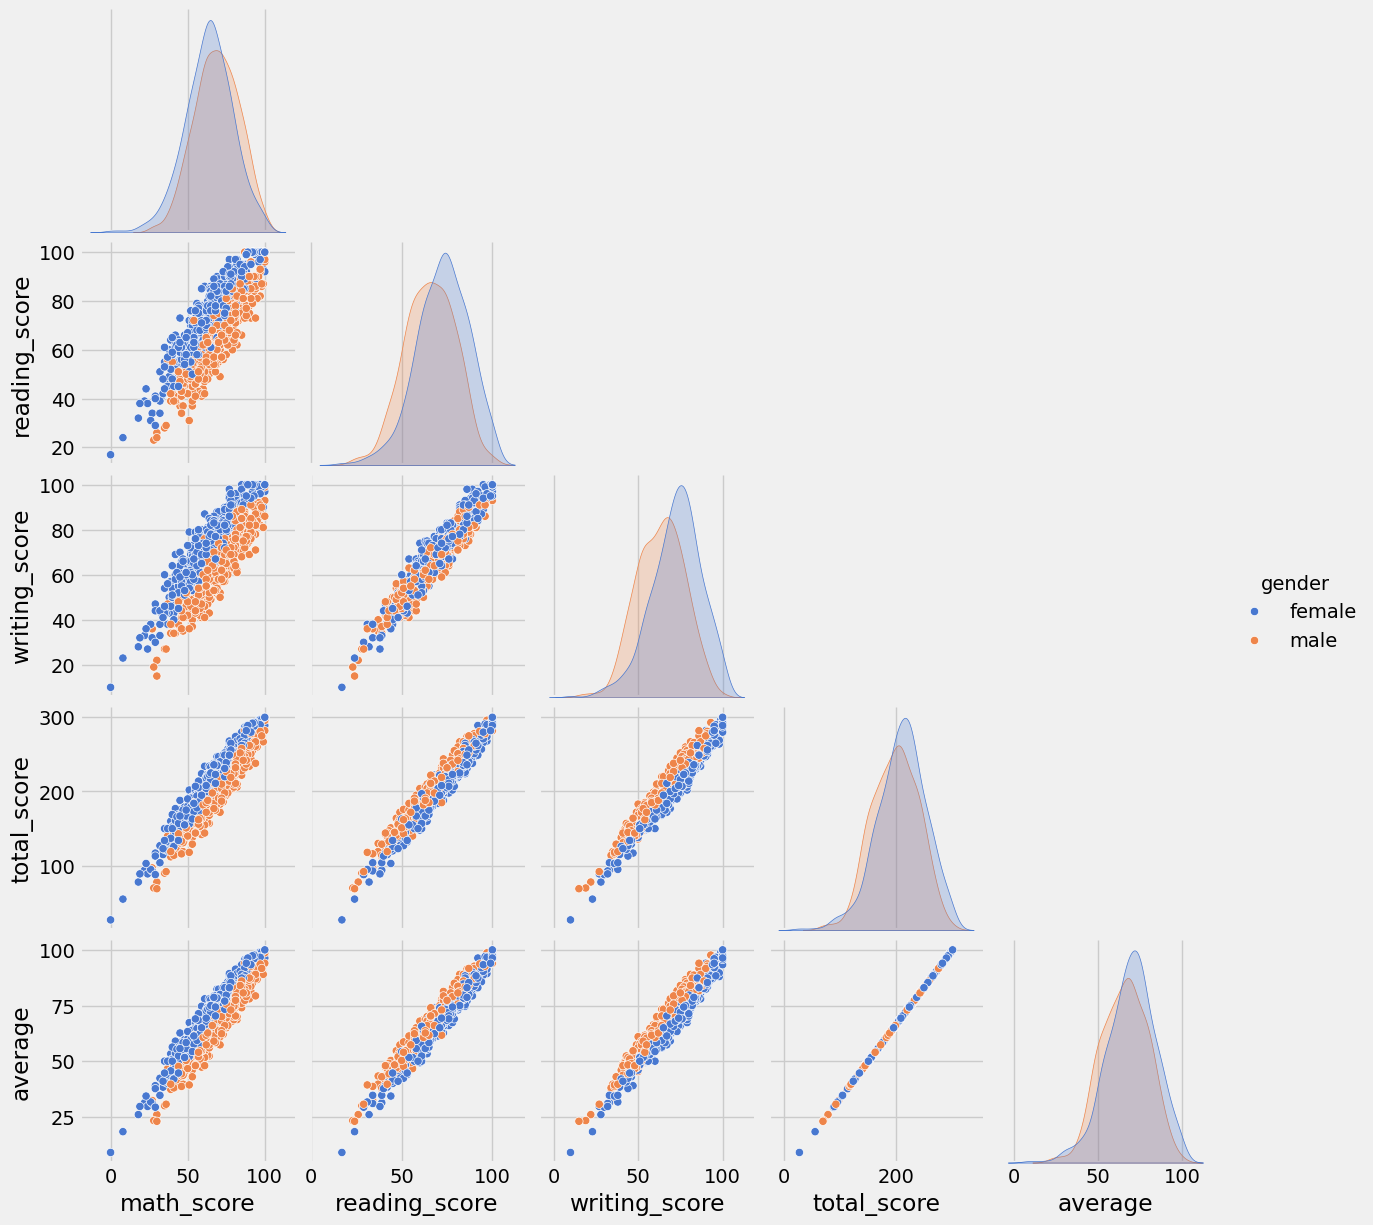

In [257]:
#np.triu(np.ones_like(a=df, dtype=bool))

sns.pairplot(data=df,hue='gender',corner=True, palette='muted')
plt.show()

In [258]:
mask_triangle = np.tril(np.ones_like(a=df, dtype=bool))
print(mask_triangle)

[[ True False False ... False False False]
 [ True  True False ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [259]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
df.columns

categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']
numerical_cols= ['math_score', 'reading_score',
       'writing_score', 'total_score', 'average']


fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
#im = axes.imshow(df['total_score'])

axes.set_xticks(range(len(df['parental_level_of_education'])), labels=df['parental_level_of_education'],
                rotation=45, ha='right', rotation_mode='anchor')
axes.set_yticks(range(len(df['test_preparation_course'])), labels=df['test_preparation_course'])

for i in range(len(df['test_preparation_course'])):
    #print(i)
    for j in range(len(df['parental_level_of_education'])):
        text=axes.text(j, i, df['total_score'][i,j], ha='center', va='center', color='w')

axes.set_title("fff")
fig.tight_layout()
plt.show()

In [260]:
df_avg_test = df['average'][0:20]
df_avg_test

#df_avg_test.round(decimals=0)
np.floor(df_avg_test)

0     72.0
1     82.0
2     92.0
3     49.0
4     76.0
5     77.0
6     91.0
7     40.0
8     65.0
9     49.0
10    54.0
11    45.0
12    73.0
13    73.0
14    53.0
15    74.0
16    87.0
17    26.0
18    44.0
19    57.0
Name: average, dtype: float64

In [261]:
### Feature Engineering

In [319]:
df_02 = df.copy()
#df_02['math_score_floor'] = np.floor(df_02['average'])
#df_02['reading_score_floor'] = np.floor(df_02['total_score'])
#df_02['writing_score_floor'] = np.floor(df_02['average'])
#df_02['total_floor'] = np.floor(df_02['total_score'])
#df_02['avg_floor'] = np.floor(df_02['average'])

In [320]:
df_02.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


gender_dict = {'female':0, 'male':1}
df_02['genderNum'] =  df_02['gender'].map(gender_dict)

gender_dict = {'female':0, 'male':1}
df_02['genderNum'] =  df_02['gender'].map(gender_dict)


sns.heatmap(df_02, numerical_cols=True)

Pearson: Linear Relationship
Computed on true values.

Spearman: Monotonic relationship
Computed on ranks.

In [321]:
## Note: Deleting total_score since it has a major effect with 'average' (Multicolinearity)
df_02.drop(columns=['total_score'], inplace=True)
#df_02.drop(columns=['average'], inplace=True)

<Axes: >

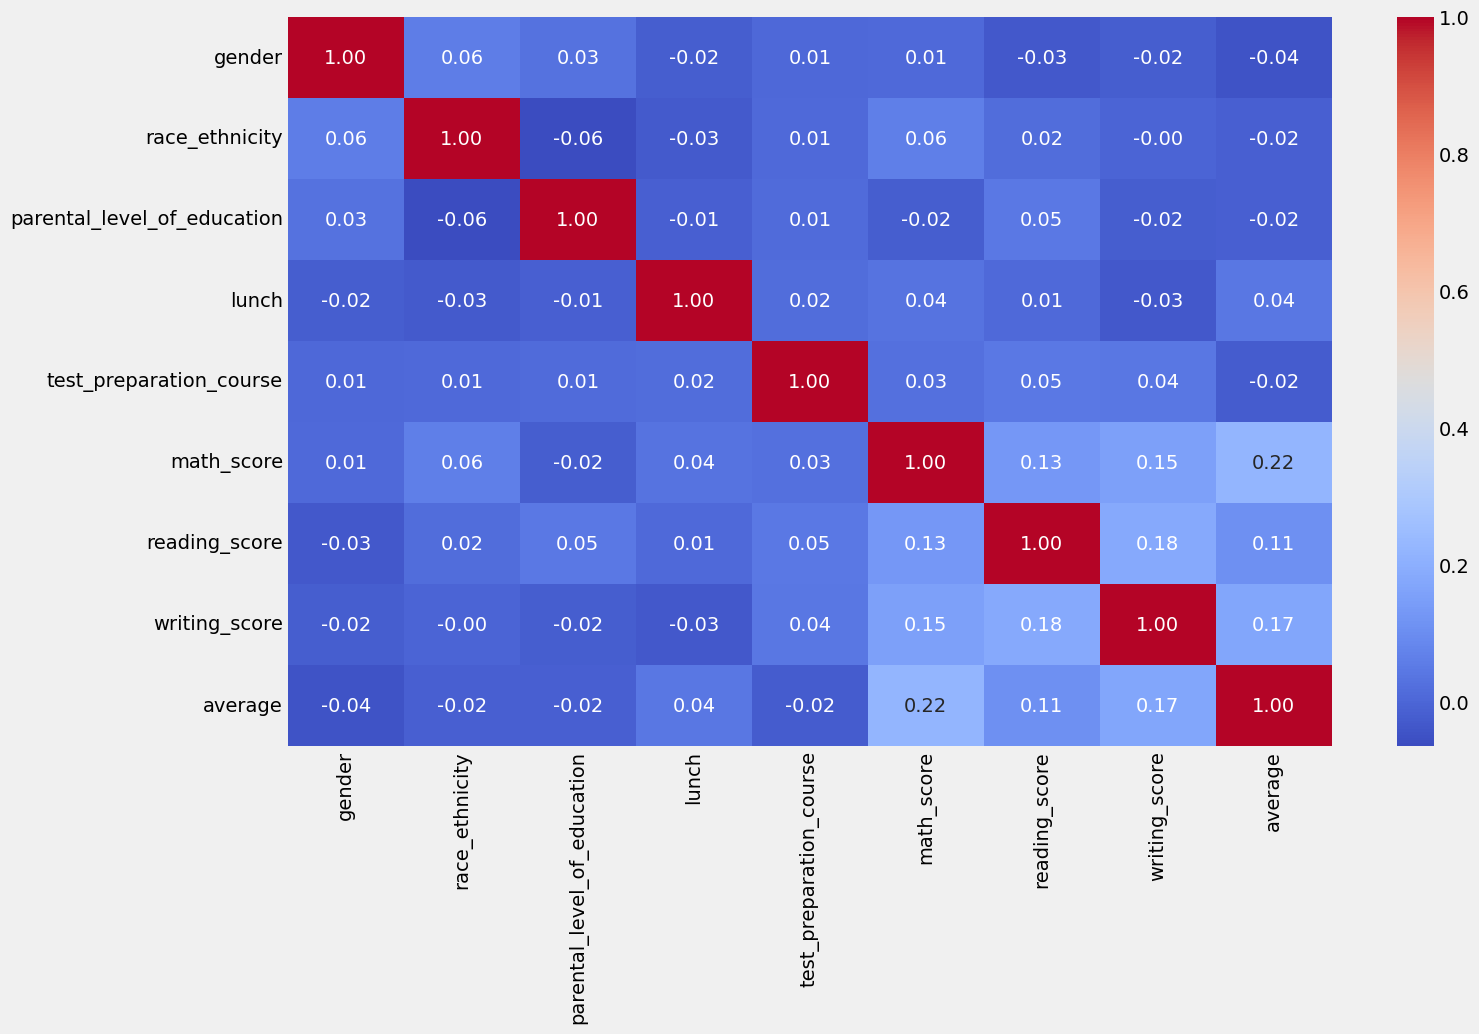

In [322]:
## Source
##https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables
##df_02.apply(lambda x:print(f"x:{x}\nend"))
## Will go into each column and factorize
df_02_for_htmp_pearson = df_02.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=0)

df_02_for_htmp_pearson

sns.heatmap(data=df_02_for_htmp_pearson, annot=True, fmt='.2f', cmap='coolwarm')

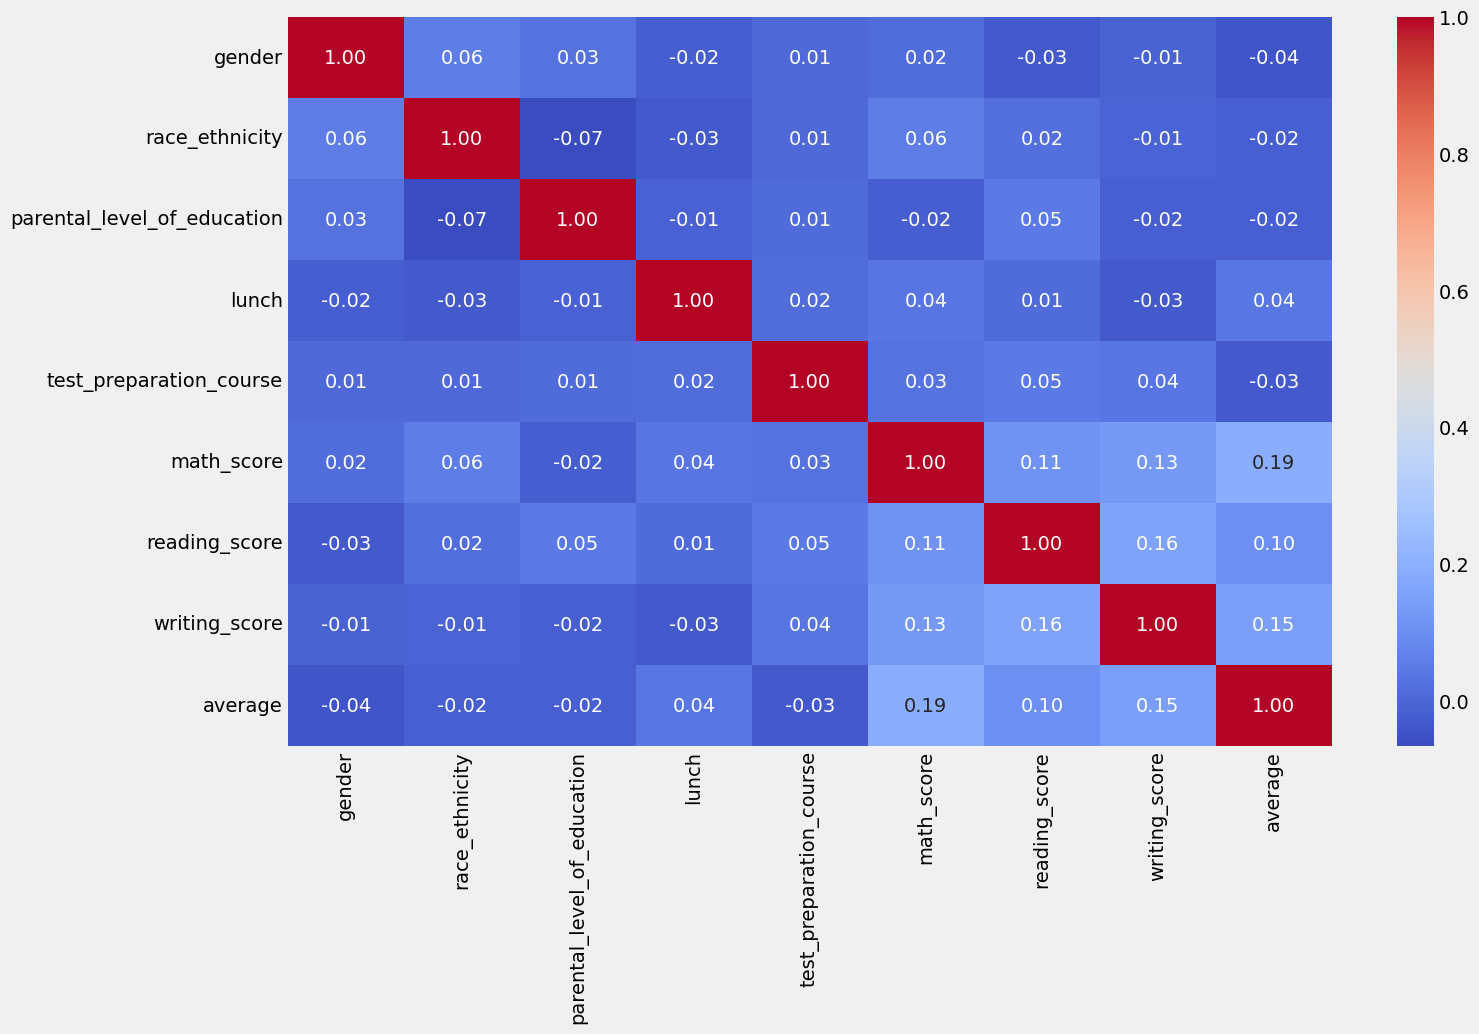

In [328]:
## Source
##https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables
##df_02.apply(lambda x:print(f"x:{x}\nend"))
## Will go into each column and factorize
df_02_for_htmp_spearman = df_02.apply(lambda x: pd.factorize(x)[0]).corr(method='spearman', min_periods=0)

df_02_for_htmp_spearman

sns.heatmap(data=df_02_for_htmp_spearman, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

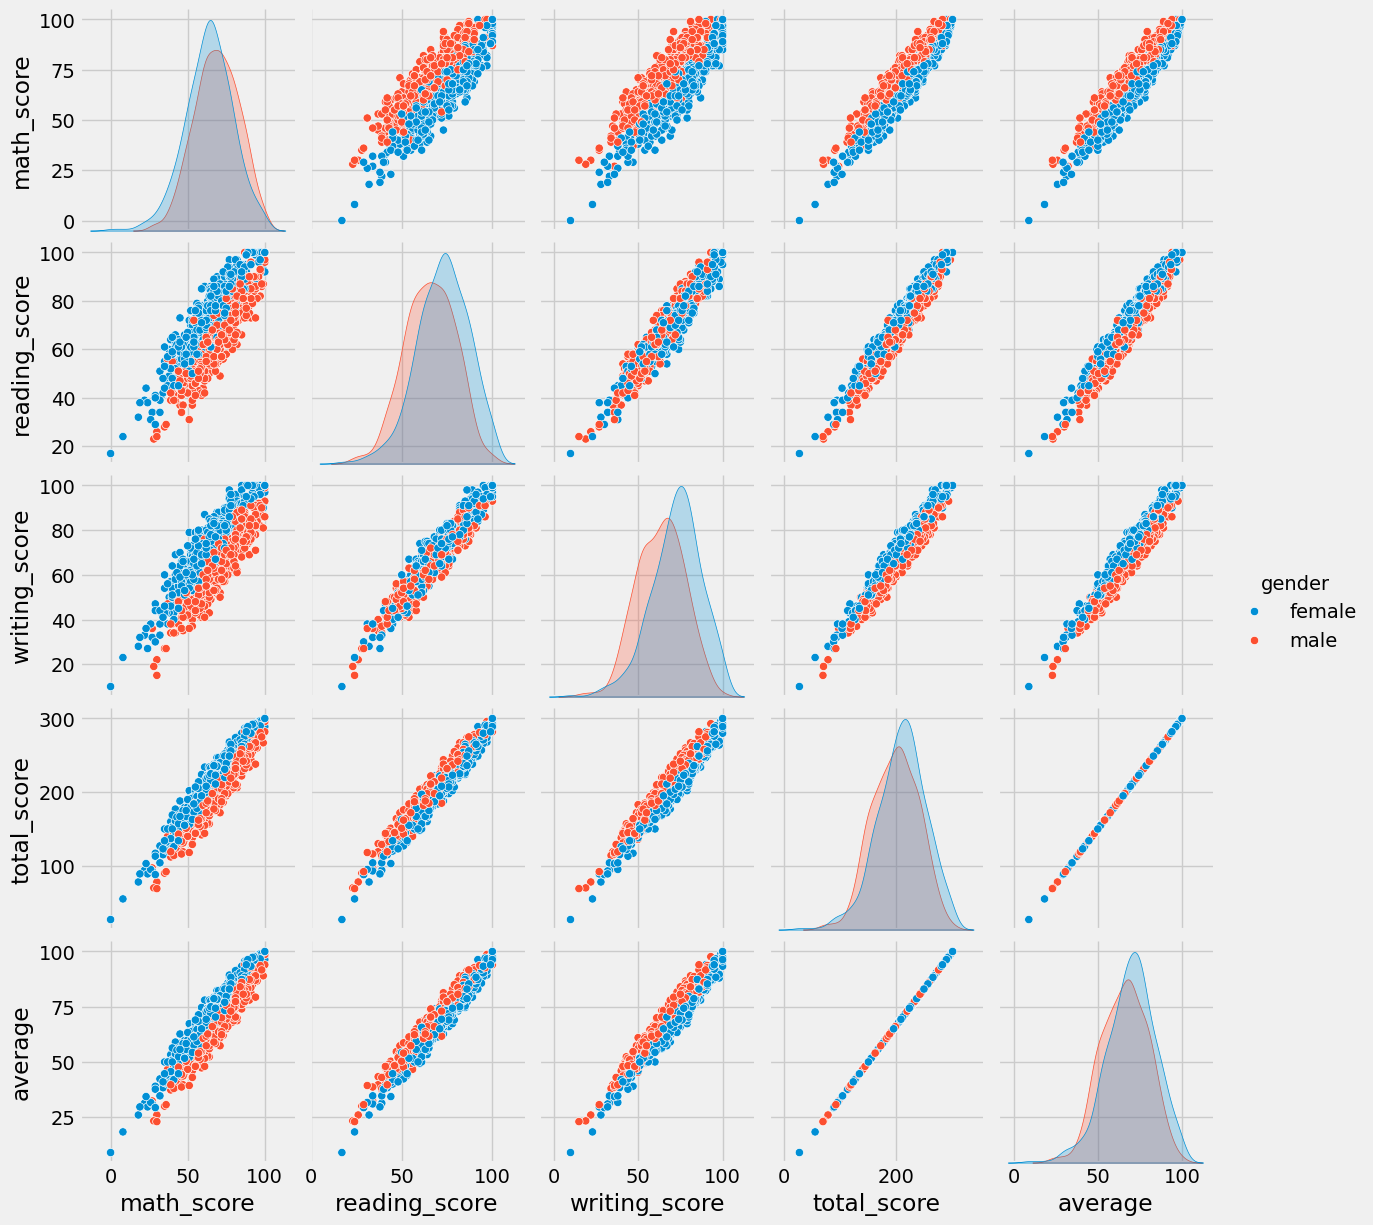

In [329]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights

All the scores increase linearly 

In [330]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

## Conclusions

* Student's performance is mostly related with lunch and the test preparation course.
* There are some factors that also influence such as the parental level of education and race ethnicity.
* The test preparation score does have an influence on student's performance.